# Perturbation Output Plots
Here we generate plots using derrida coefficients, final Hamming distances, fuzzy and non-fuzzy quasicoherence of each models. The data is generated using `analysis\derrida_coefficients.py` and `analysis\long_term_perturbation.py`.

In [1]:
import pandas as pd
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
from matplotlib.patches import Rectangle
%matplotlib inline

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
plt.rcParams.update({"font.size":20})

In [2]:
models_dir = "corrected_models"  # cell_collective OR corrected_models

QCF = pd.read_csv(f"data/{models_dir}/quasicoherence_fuzzy_withsource.csv")
QCN = pd.read_csv(f"data/{models_dir}/quasicoherence_nonfuzzy_withsource.csv")
QCFNS = pd.read_csv(f"data/{models_dir}/quasicoherence_fuzzy_sourceless.csv")
QCNS = pd.read_csv(f"data/{models_dir}/quasicoherence_nonfuzzy_sourceless.csv")
FHD = pd.read_csv(f"data/{models_dir}/final_hamming_distance_withsource.csv")
FHDNS = pd.read_csv(f"data/{models_dir}/final_hamming_distance_sourceless.csv")
DC = pd.read_csv(f"data/{models_dir}/derrida_coefficients.csv")
QC = pd.read_csv("data/model_categories.csv")

In [3]:
QC = QC.merge(QCN)
QC = QC.merge(QCF)
QC = QC.merge(QCNS)
QC = QC.merge(QCFNS)
QC = QC.merge(FHD)
QC = QC.merge(FHDNS)
QC = QC.merge(DC)
QC.columns = [
    "name",
    "category",
    "PMID",
    "SQC",
    "AQC",
    "SFQC",
    "AFQC",
    "SQCNS",
    "AQCNS",
    "SFQCNS",
    "AFQCNS",
    "SFHD",
    "AFHD",
    "SFHDNS",
    "AFHDNS",
    "SDC",
    "ADC",
    "SDCNS",
    "ADCNS",
]


N = []
NS = []
for name in sorted(QC["name"]):
    with open(f"models/{models_dir}/{name}.txt") as f:
        nt = 0
        ns = 0
        for row in f:
            if row[0] == "#":
                continue
            nt += 1
            if row.split(",")[0].strip() == row.split(",")[1].strip():
                ns += 1
        N.append(nt)
        NS.append(ns)

NDF = pd.DataFrame(
    {
        "name": sorted(QC["name"]),
        "N": N,
        "NS": NS,
    }
)

QC = QC.merge(NDF)

# Fragility =
# long-term difference in node avg. values after initial 1-node perturbation
QC["AF"] = (1 - QC["AFQC"]) * (QC["N"])
QC["SF"] = (1 - QC["SFQC"]) * (QC["N"])
QC["AFNS"] = (1 - QC["AFQCNS"]) * (QC["N"] - QC["NS"])
QC["SFNS"] = (1 - QC["SFQCNS"]) * (QC["N"] - QC["NS"])

QC.sort_values(by=["name"])

name  \
0                                   Apoptosis Network   
1                     Arabidopsis thaliana Cell Cycle   
2                    Aurora Kinase A in Neuroblastoma   
3   B bronchiseptica and T retortaeformis coinfection   
4                              B cell differentiation   
7       BT474 Breast Cell Line Long-term ErbB Network   
8      BT474 Breast Cell Line Short-term ErbB Network   
5                           Bordetella bronchiseptica   
6    Bortezomib Responses in U266 Human Myeloma Cells   
10                           Budding Yeast Cell Cycle   
9                       Budding Yeast Cell Cycle 2009   
12                               CD4 T cell signaling   
13         CD4+ T Cell Differentiation and Plasticity   
14                        CD4+ T cell Differentiation   
11                                Cardiac development   
15  Cell Cycle Transcription by Coupled CDK and Ne...   
16                     Cholesterol Regulatory Pathway   
17                    Colitis-associated colon cancer   
18                          Cortical Area Development   
19                           Death Receptor Signaling   
20                   Differentiation of T lymphocytes   
21                              EGFR & ErbB Signaling   
22                                    FA BRCA pathway   
24      FGF pathway of Drosophila Signalling Pathways   
23             Fanconi anemia and checkpoint recovery   
25                  Glucose Repression Signaling 2009   
26                 Guard Cell Abscisic Acid Signaling   
27    HCC1954 Breast Cell Line Long-term ErbB Network   
28   HCC1954 Breast Cell Line Short-term ErbB Network   
29                     HGF Signaling in Keratinocytes   
30        HH Pathway of Drosophila Signaling Pathways   
31  HIV-1 interactions with T Cell Signalling Pathway   
32                    Human Gonadal Sex Determination   
33     IGVH mutations in chronic lymphocytic leukemia   
34                                     IL-1 Signaling   
35                                    IL-6 Signalling   
36                Influenza A Virus Replication Cycle   
37  Iron acquisition and oxidative stress response...   
38                                         Lac Operon   
39  Lymphoid and myeloid cell specification and tr...   
40                   Lymphopoiesis Regulatory Network   
43                      MAPK Cancer Cell Fate Network   
42                               Mammalian Cell Cycle   
41                          Mammalian Cell Cycle 2006   
44       Metabolic Interactions in the Gut Microbiome   
45                 Neurotransmitter Signaling Pathway   
46                           Oxidative Stress Pathway   
47                          PC12 Cell Differentiation   
48  Pro-inflammatory Tumor Microenvironment in Acu...   
49  Processing of Spz Network from the Drosophila ...   
50  Regulation of the L-arabinose operon of Escher...   
55      SKBR3 Breast Cell Line Long-term ErbB Network   
56     SKBR3 Breast Cell Line Short-term ErbB Network   
51          Senescence Associated Secretory Phenotype   
52                       Septation Initiation Network   
53                 Signal Transduction in Fibroblasts   
54                 Signaling in Macrophage Activation   
57                             Stomatal Opening Model   
59                          T Cell Receptor Signaling   
58                             T cell differentiation   
60                              T-Cell Signaling 2006   
61                        T-LGL Survival Network 2008   
63                        T-LGL Survival Network 2011   
62        T-LGL Survival Network 2011 Reduced Network   
64                             TOL Regulatory Network   
65       Toll Pathway of Drosophila Signaling Pathway   
66  Treatment of Castration-Resistant Prostate Cancer   
67                    Trichostrongylus retortaeformis   
68                 Tumour Cell Invasion and Migration   
69       VEGF Pathway of Drosophila Signaling Pathway   
70

In [4]:
class PlotVar:
    _label_dict = {
        "SFQC": r"$\tilde{q}_{s,p}$ : sync. fuzzy quasicoherence",
        "AFQC": r"$\tilde{q}_{a,p}$ : async. fuzzy quasicoherence",
        "SFQCNS": r"$\tilde{q}_{s,f}$ : sync. fuzzy quasicoherence (fixed source)",
        "AFQCNS": r"$\tilde{q}_{a,f}$ : async. fuzzy quasicoherence (fixed source)",
        "SQC": r"$q_{s,p}$ : sync. quasicoherence",
        "AQC": r"$q_{a,p}$ : async. quasicoherence",
        "SQCNS": r"$q_{s,f}$ : sync. quasicoherence (fixed source)",
        "AQCNS": r"$q_{a,f}$ : async. quasicoherence (fixed source)",
        "SFHD": r"$h^{\infty}_{s,p}$ : sync. final Hamming distance",
        "AFHD": r"$h^{\infty}_{a,p}$ : async. final Hamming distance",
        "SFHDNS": r"$h^{\infty}_{s,f}$ : sync. final Hamming distance (fixed source)",
        "AFHDNS": r"$h^{\infty}_{a,f}$ : async. final Hamming distance (fixed source)",
        "SF": r"$\varphi_{s,p}$ : sync. fragility",
        "AF": r"$\varphi_{a,p}$ : async. fragility",
        "SFNS": r"$\varphi_{s,f}$ : sync. fragility (fixed source)",
        "AFNS": r"$\varphi_{a,f}$ : async. fragility (fixed source)",
        "SDC": r"$\delta_{s,p}$ : sync. Derrida coefficient",
        "ADC": r"$\delta_{a,p}$ : async. Derrida coefficient",
        "SDCNS": r"$\delta_{s,f}$ : sync. Derrida coefficient (fixed source)",
        "ADCNS": r"$\delta_{a,f}$ : async. Derrida coefficient (fixed source)",
    }

    def __init__(self, name: str, minval: float, maxval: float):
        self.name = name
        self.minval = minval
        self.maxval = maxval
        self.label = self._label_dict[name]

In [5]:
highlight_marker_size = 350
highlight_alpha = 1

color_list = [
    "#88CCEE",
    "#44AA99",
    "#117733",
    "#433685",
    "#DDCC77",
    "#999933",
    "#CC6677",
    "#882255",
    "#AA4499",
    "#4141FF",
    "#FF66FF",
]  # tol_muted scheme

highlight_dict = {
    "Apoptosis Network": (color_list[0], highlight_marker_size, highlight_alpha),
    "Arabidopsis thaliana Cell Cycle": (
        color_list[1],
        highlight_marker_size,
        highlight_alpha,
    ),
    "Aurora Kinase A in Neuroblastoma": (
        color_list[2],
        highlight_marker_size,
        highlight_alpha,
    ),
    "Cell Cycle Transcription by Coupled CDK and Network Oscillators": (
        color_list[10],
        highlight_marker_size,
        highlight_alpha,
    ),
    "Colitis-associated colon cancer": (
        color_list[5],
        highlight_marker_size,
        highlight_alpha,
    ),
    "Cortical Area Development": (
        color_list[4],
        highlight_marker_size,
        highlight_alpha,
    ),
    "Human Gonadal Sex Determination": (
        color_list[3],
        highlight_marker_size,
        highlight_alpha,
    ),
    "Metabolic Interactions in the Gut Microbiome": (
        color_list[6],
        highlight_marker_size,
        highlight_alpha,
    ),
    "Regulation of the L-arabinose operon of Escherichia coli": (
        color_list[7],
        highlight_marker_size,
        highlight_alpha,
    ),
    "Tumour Cell Invasion and Migration": (
        color_list[8],
        highlight_marker_size,
        highlight_alpha,
    ),
    "Signal Transduction in Fibroblasts": (
        color_list[9],
        highlight_marker_size,
        highlight_alpha,
    ),
}
default_highlight = ("black", 250, 0.2)

category_symbol_dict = {
    "Cancer": "X",
    "Cancer Drug Response": "P",
    "Cell Cycle": "o",
    "Development and Differentiation": "d",
    "Infection and Microbiome": "p",
    "Metabolism": "H",
    "Signal Transduction (Immune System Cells)": "^",
    "Signal Transduction (Other)": "v",
    "Signal Transduction (Drosophila)": ">",
    "Signal Transduction (Stress/Damage and Homeostasis)": "<",
}


def hc(df):
    return [highlight_dict.get(name, default_highlight)[0] for name in df["name"]]


def hs(df):
    return [highlight_dict.get(name, default_highlight)[1] for name in df["name"]]


def halpha(df):
    return [highlight_dict.get(name, default_highlight)[2] for name in df["name"]]


groups = QC.groupby("category")

In [6]:
def comparison_plots(vars, hlines=None, vlines=None, quads=None):
    icount = len(vars)
    jcount = len(vars[0])

    fig = plt.figure(figsize=(10 * jcount, 10 * icount))
    fig.set_facecolor("white")

    figs = fig.subfigures(icount, jcount)
    figs = np.reshape(
        figs, (icount, jcount)
    )  # always treat as 2d array, even when only 1 col or row

    stretch_factor = 6
    for i, j in it.product(range(icount), range(jcount)):
        px, py = vars[i][j]
        vx, vy = px.name, py.name
        xmin, xmax = px.minval, px.maxval  # lims[i][j][0]
        ymin, ymax = py.minval, py.maxval  # lims[i][j][1]
        axd = figs[i, j].subplot_mosaic(
            [
                ["x0", "."],
                ["s0", "y0"],
            ],
            gridspec_kw={
                "width_ratios": [stretch_factor, 1],
                "height_ratios": [1, stretch_factor],
            },
        )

        axd["s0"].set_zorder(10)
        axd["x0"].set_zorder(-10)
        axd["y0"].set_zorder(-10)

        dx = gaussian_kde(QC[vx])
        lx = np.linspace(xmin, xmax, 1000)
        dlx = dx(lx)
        axd["x0"].fill_between(lx, dlx, color="lightgrey")
        axd["x0"].vlines(
            np.quantile(QC[vx], [0.0, 0.25, 0.5, 0.75, 1.0]),
            0,
            np.array([0.25, 0.5, 1.0, 0.5, 0.25]) * max(dlx) / 2,
            linewidth=5,
            color="red",
        )
        dy = gaussian_kde(QC[vy])
        ly = np.linspace(ymin, ymax, 1000)
        dly = dy(ly)
        axd["y0"].fill_betweenx(ly, dly, color="lightgrey")
        axd["y0"].hlines(
            np.quantile(QC[vy], [0.0, 0.25, 0.5, 0.75, 1.0]),
            0,
            np.array([0.25, 0.5, 1.0, 0.5, 0.25]) * max(dly) / 2,
            linewidth=5,
            color="red",
        )

        if hlines:
            axd["s0"].hlines(hlines, xmin, xmax, color="gray", linestyle="-.")
        if vlines:
            axd["s0"].vlines(vlines, ymin, ymax, color="gray", linestyle="-.")

        if quads:
            sx, sy, quad_colors, quad_names = quads  # top right, then counter-clockwise
            from matplotlib.colors import LinearSegmentedColormap

            color_maps = [
                LinearSegmentedColormap.from_list("Temperature Map", ["white", x])
                for x in quad_colors
            ]
            interp_method = "gaussian"

            im0 = axd["s0"].imshow(
                np.array([[0, 1], [0, 0]]),
                interpolation=interp_method,
                clim=(0, 1),
                aspect="auto",
                extent=(sx, xmax, sy, ymax),
                cmap=color_maps[0],
            )
            im1 = axd["s0"].imshow(
                np.array([[1, 0], [0, 0]]),
                interpolation=interp_method,
                clim=(0, 1),
                aspect="auto",
                extent=(0, sx, sy, ymax),
                cmap=color_maps[1],
            )
            im2 = axd["s0"].imshow(
                np.array([[0, 0], [1, 0]]),
                interpolation=interp_method,
                clim=(0, 1),
                aspect="auto",
                extent=(0, sx, 0, sy),
                cmap=color_maps[2],
            )
            im3 = axd["s0"].imshow(
                np.array([[0, 0], [0, 1]]),
                interpolation=interp_method,
                clim=(0, 1),
                aspect="auto",
                extent=(sx, xmax, 0, sy),
                cmap=color_maps[3],
            )

            # regions = [
            #     Rectangle((sx, sx), xmax - sx, ymax - sy, color=quad_colors[0]),
            #     Rectangle((xmin, sy), sx - xmin, ymax - sy, color=quad_colors[1]),
            #     Rectangle((xmin, ymin), sx - xmin, sy - ymin, color=quad_colors[2]),
            #     Rectangle((sx, ymin), xmax - sx, sy - ymin, color=quad_colors[3]),
            # ]

            # for r in regions:
            #     axd["s0"].add_patch(r)

            axd["s0"].annotate(
                quad_names[0],
                xy=((xmax + sx) / 2, (ymax + sy) / 2),
                ha="center",
                va="center",
            )
            axd["s0"].annotate(
                quad_names[1],
                xy=((xmin + sx) / 2, (ymax + sy) / 2),
                ha="center",
                va="center",
            )
            axd["s0"].annotate(
                quad_names[2],
                xy=((xmin + sx) / 2, (ymin + sy) / 2),
                ha="center",
                va="center",
            )
            axd["s0"].annotate(
                quad_names[3],
                xy=((xmax + sx) / 2, (ymin + sy) / 2),
                ha="center",
                va="center",
            )

        axd["s0"].axline((1, 1), slope=1, linestyle="--", color="k")
        for name, group in groups:
            axd["s0"].scatter(
                group[vx],
                group[vy],
                c=hc(group),
                s=hs(group),
                alpha=halpha(group),
                marker=category_symbol_dict[name],
                linewidths=2,
                edgecolor="k",
                zorder=10,
                clip_on=False,
            )
        axd["s0"].set_xlabel(px.label)
        axd["s0"].set_ylabel(py.label)
        axd["s0"].set_xlim(xmin, xmax)
        axd["s0"].set_ylim(ymin, ymax)

        axd["x0"].sharex(axd["s0"])
        axd["y0"].sharey(axd["s0"])
        axd["x0"].tick_params(axis="x", labelbottom=False)
        axd["y0"].tick_params(axis="x", labelbottom=False)
        axd["x0"].tick_params(axis="y", labelleft=False)
        axd["y0"].tick_params(axis="y", labelleft=False)

        figs[i, j].subplots_adjust(hspace=0.0135, wspace=0.0135)
    fig.subplots_adjust(bottom=0.08, left=0.05)
    return fig

## Plots for Main Text

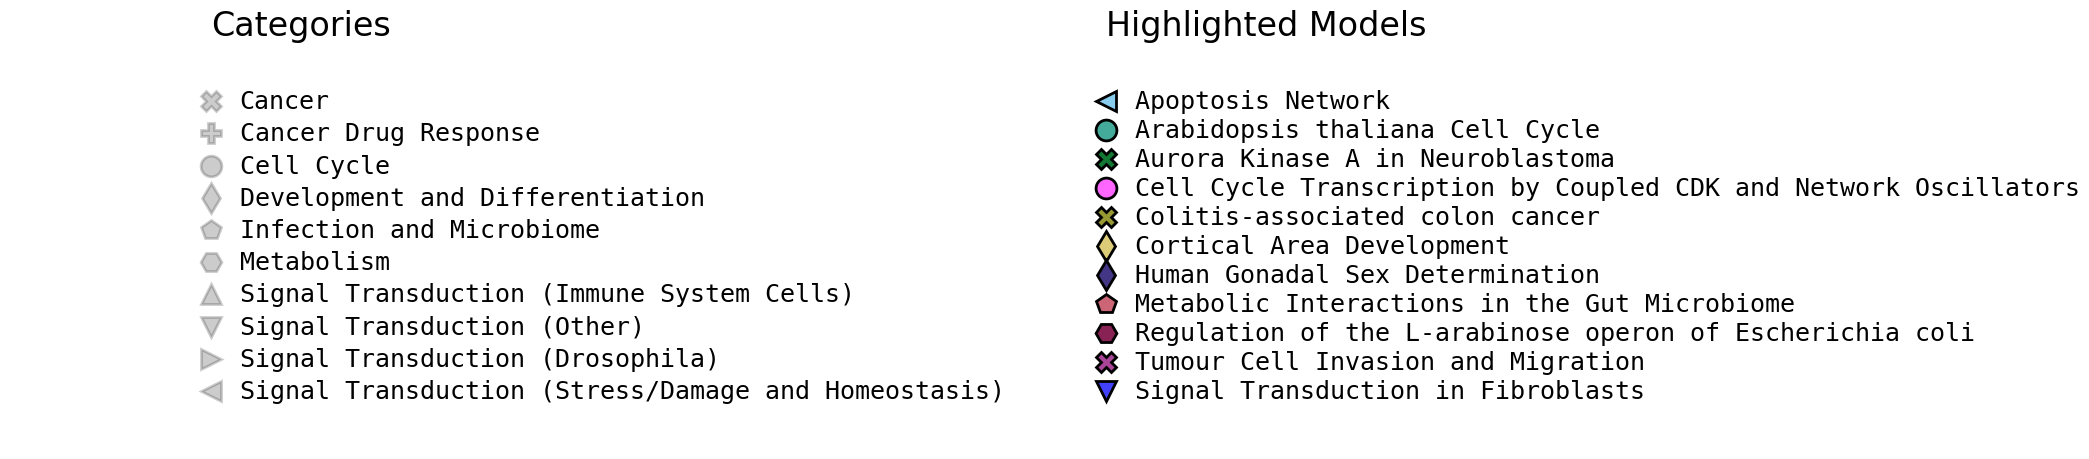

In [7]:
text_style = dict(
    horizontalalignment="left",
    verticalalignment="center",
    fontsize=18,
    fontfamily="monospace",
)
marker_style = dict(linestyle=":", markersize=15)


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()
    ax.invert_yaxis()


fig, ax = plt.subplots(1, 2, figsize=(20, 5))
fig.set_facecolor("white")
# fig.suptitle("Shared Legend", fontsize=24)
# fig.subplots_adjust(right=-4,left=-5)

for y, (name, marker) in enumerate(category_symbol_dict.items()):
    ax[0].text(0.01, y, name, **text_style)
    ax[0].plot(
        [y] * 1,
        c=default_highlight[0],
        alpha=default_highlight[2],
        marker=marker,
        markeredgewidth=2,
        markeredgecolor="k",
        **marker_style,
    )
for y, (name, marker_data) in enumerate(highlight_dict.items()):
    ax[1].text(0.01, y, name, **text_style)
    ax[1].plot(
        [y] * 1,
        c=marker_data[0],
        alpha=marker_data[2],
        marker=category_symbol_dict[QC[QC["name"] == name]["category"].values[0]],
        markeredgewidth=2,
        markeredgecolor="k",
        **marker_style,
    )
ax[0].set_title("Categories", horizontalalignment="left")
ax[1].set_title("Highlighted Models", horizontalalignment="left")
format_axes(ax[0])
format_axes(ax[1])

fig.tight_layout()
plt.savefig(f"./data/{models_dir}/figures/shared_legend.png", bbox_inches="tight")
plt.savefig(f"./data/{models_dir}/figures/shared_legend.pdf", bbox_inches="tight")
plt.show()

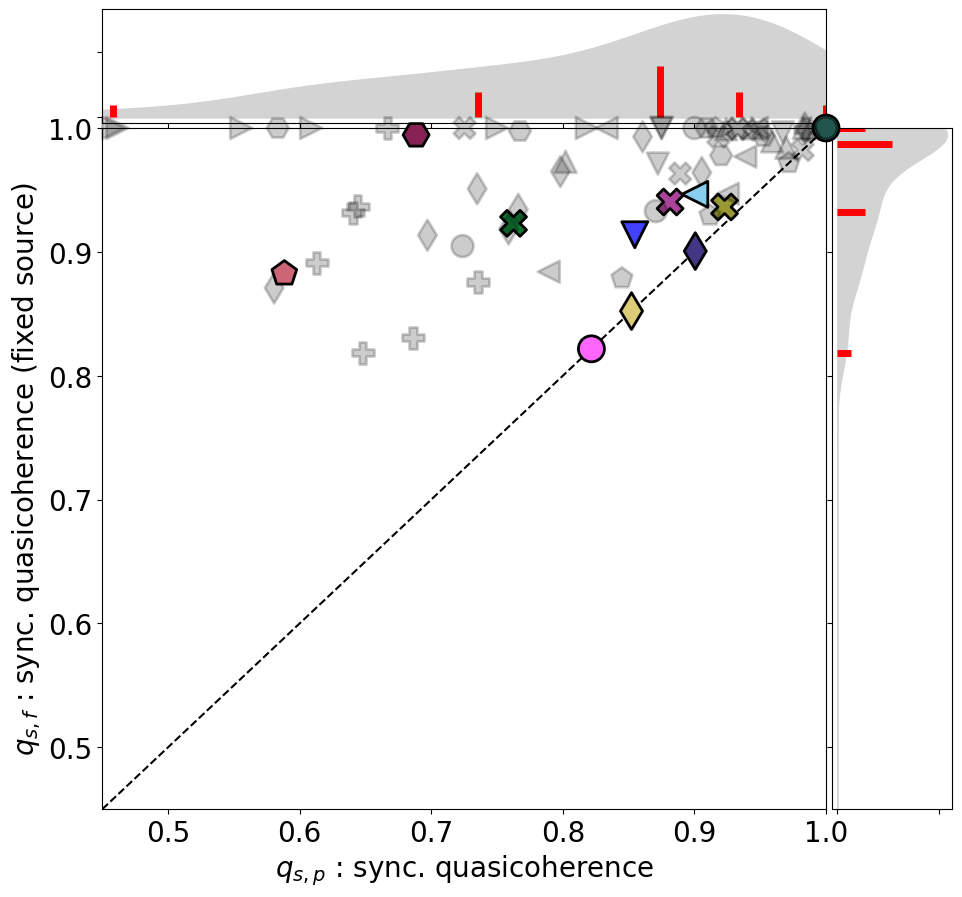

In [8]:
vars = [
    [
        (
            PlotVar("SQC", 0.45, 1.0),
            PlotVar("SQCNS", 0.45, 1.0),
        ),
    ],
]

fig = comparison_plots(vars)
fig.savefig(
    f"./data/{models_dir}/figures/quasicoherence_sources.png", bbox_inches="tight"
)
fig.savefig(
    f"./data/{models_dir}/figures/quasicoherence_sources.pdf", bbox_inches="tight"
)

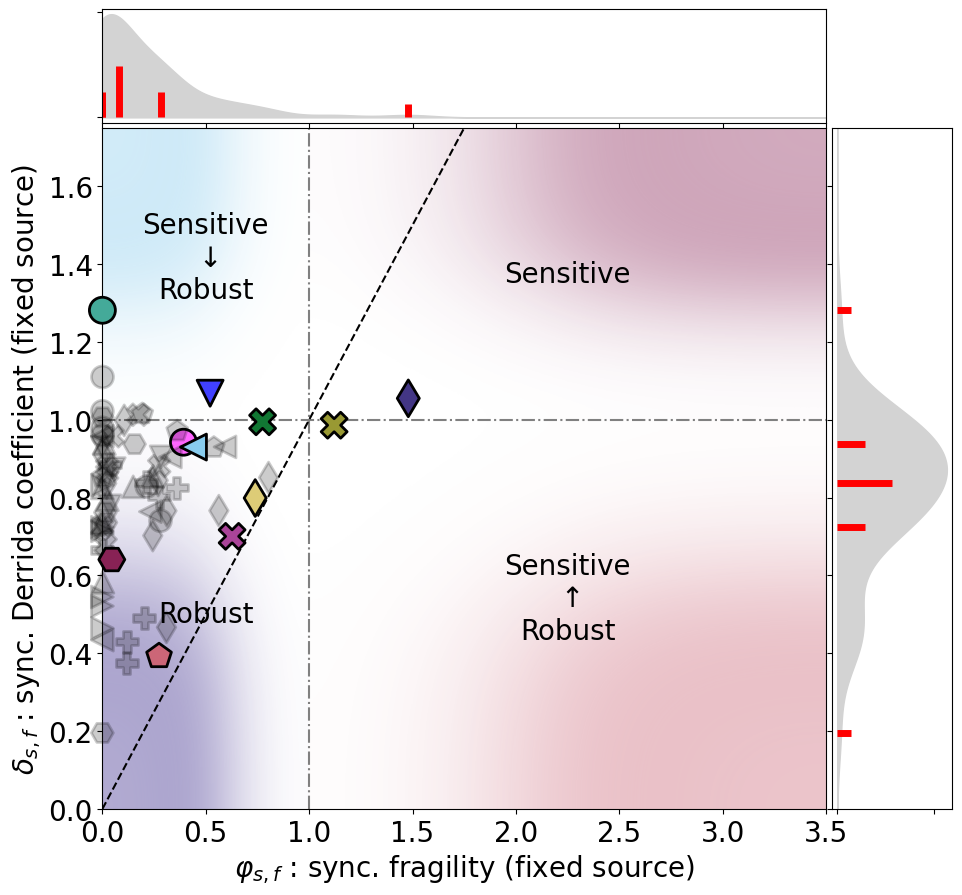

In [9]:
vars = [
    [
        (PlotVar("SFNS", 0.0, 3.5), PlotVar("SDCNS", 0.0, 1.75)),
    ],
]

quads = (
    1,
    1,
    [
        "#88225560",
        "#88CCEE60",
        "#33228860",
        "#CC667760",
    ],
    [
        "Sensitive",
        ("Sensitive\n" + r"$\downarrow$" + "\nRobust\n"),
        "Robust",
        ("Sensitive\n" + r"$\uparrow$" + "\nRobust\n"),
    ],
)

fig = comparison_plots(vars, hlines=1, vlines=1, quads=quads)
fig.savefig(
    f"./data/{models_dir}/figures/short-term-long-term.png", bbox_inches="tight"
)
fig.savefig(
    f"./data/{models_dir}/figures/short-term-long-term.pdf", bbox_inches="tight"
)

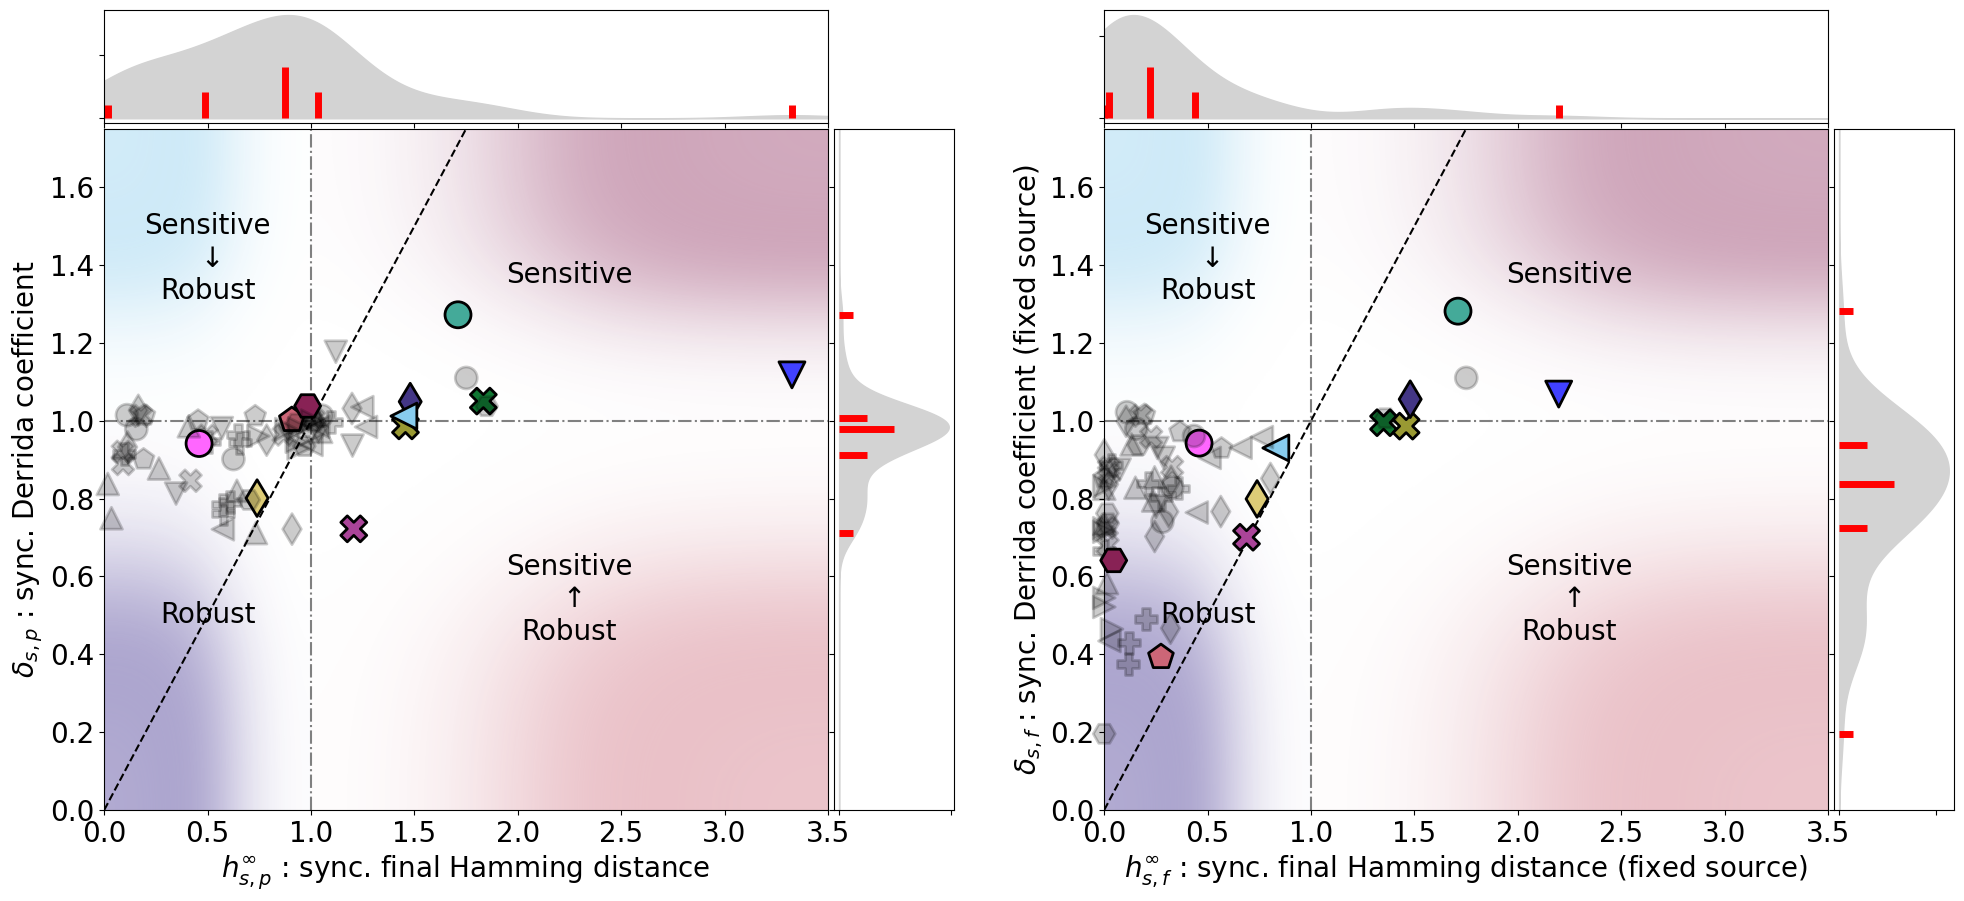

In [10]:
vars = [
    [
        (PlotVar("SFHD", 0.0, 3.5), PlotVar("SDC", 0.0, 1.75)),
        (PlotVar("SFHDNS", 0.0, 3.5), PlotVar("SDCNS", 0.0, 1.75)),
    ],
]

quads = (
    1,
    1,
    [
        "#88225560",
        "#88CCEE60",
        "#33228860",
        "#CC667760",
    ],
    [
        "Sensitive",
        ("Sensitive\n" + r"$\downarrow$" + "\nRobust\n"),
        "Robust",
        ("Sensitive\n" + r"$\uparrow$" + "\nRobust\n"),
    ],
)

fig = comparison_plots(vars, hlines=1, vlines=1, quads=quads)
fig.savefig(f"./data/{models_dir}/figures/Derrida-predictive.png", bbox_inches="tight")
fig.savefig(f"./data/{models_dir}/figures/Derrida-predictive.pdf", bbox_inches="tight")

## Additional plots

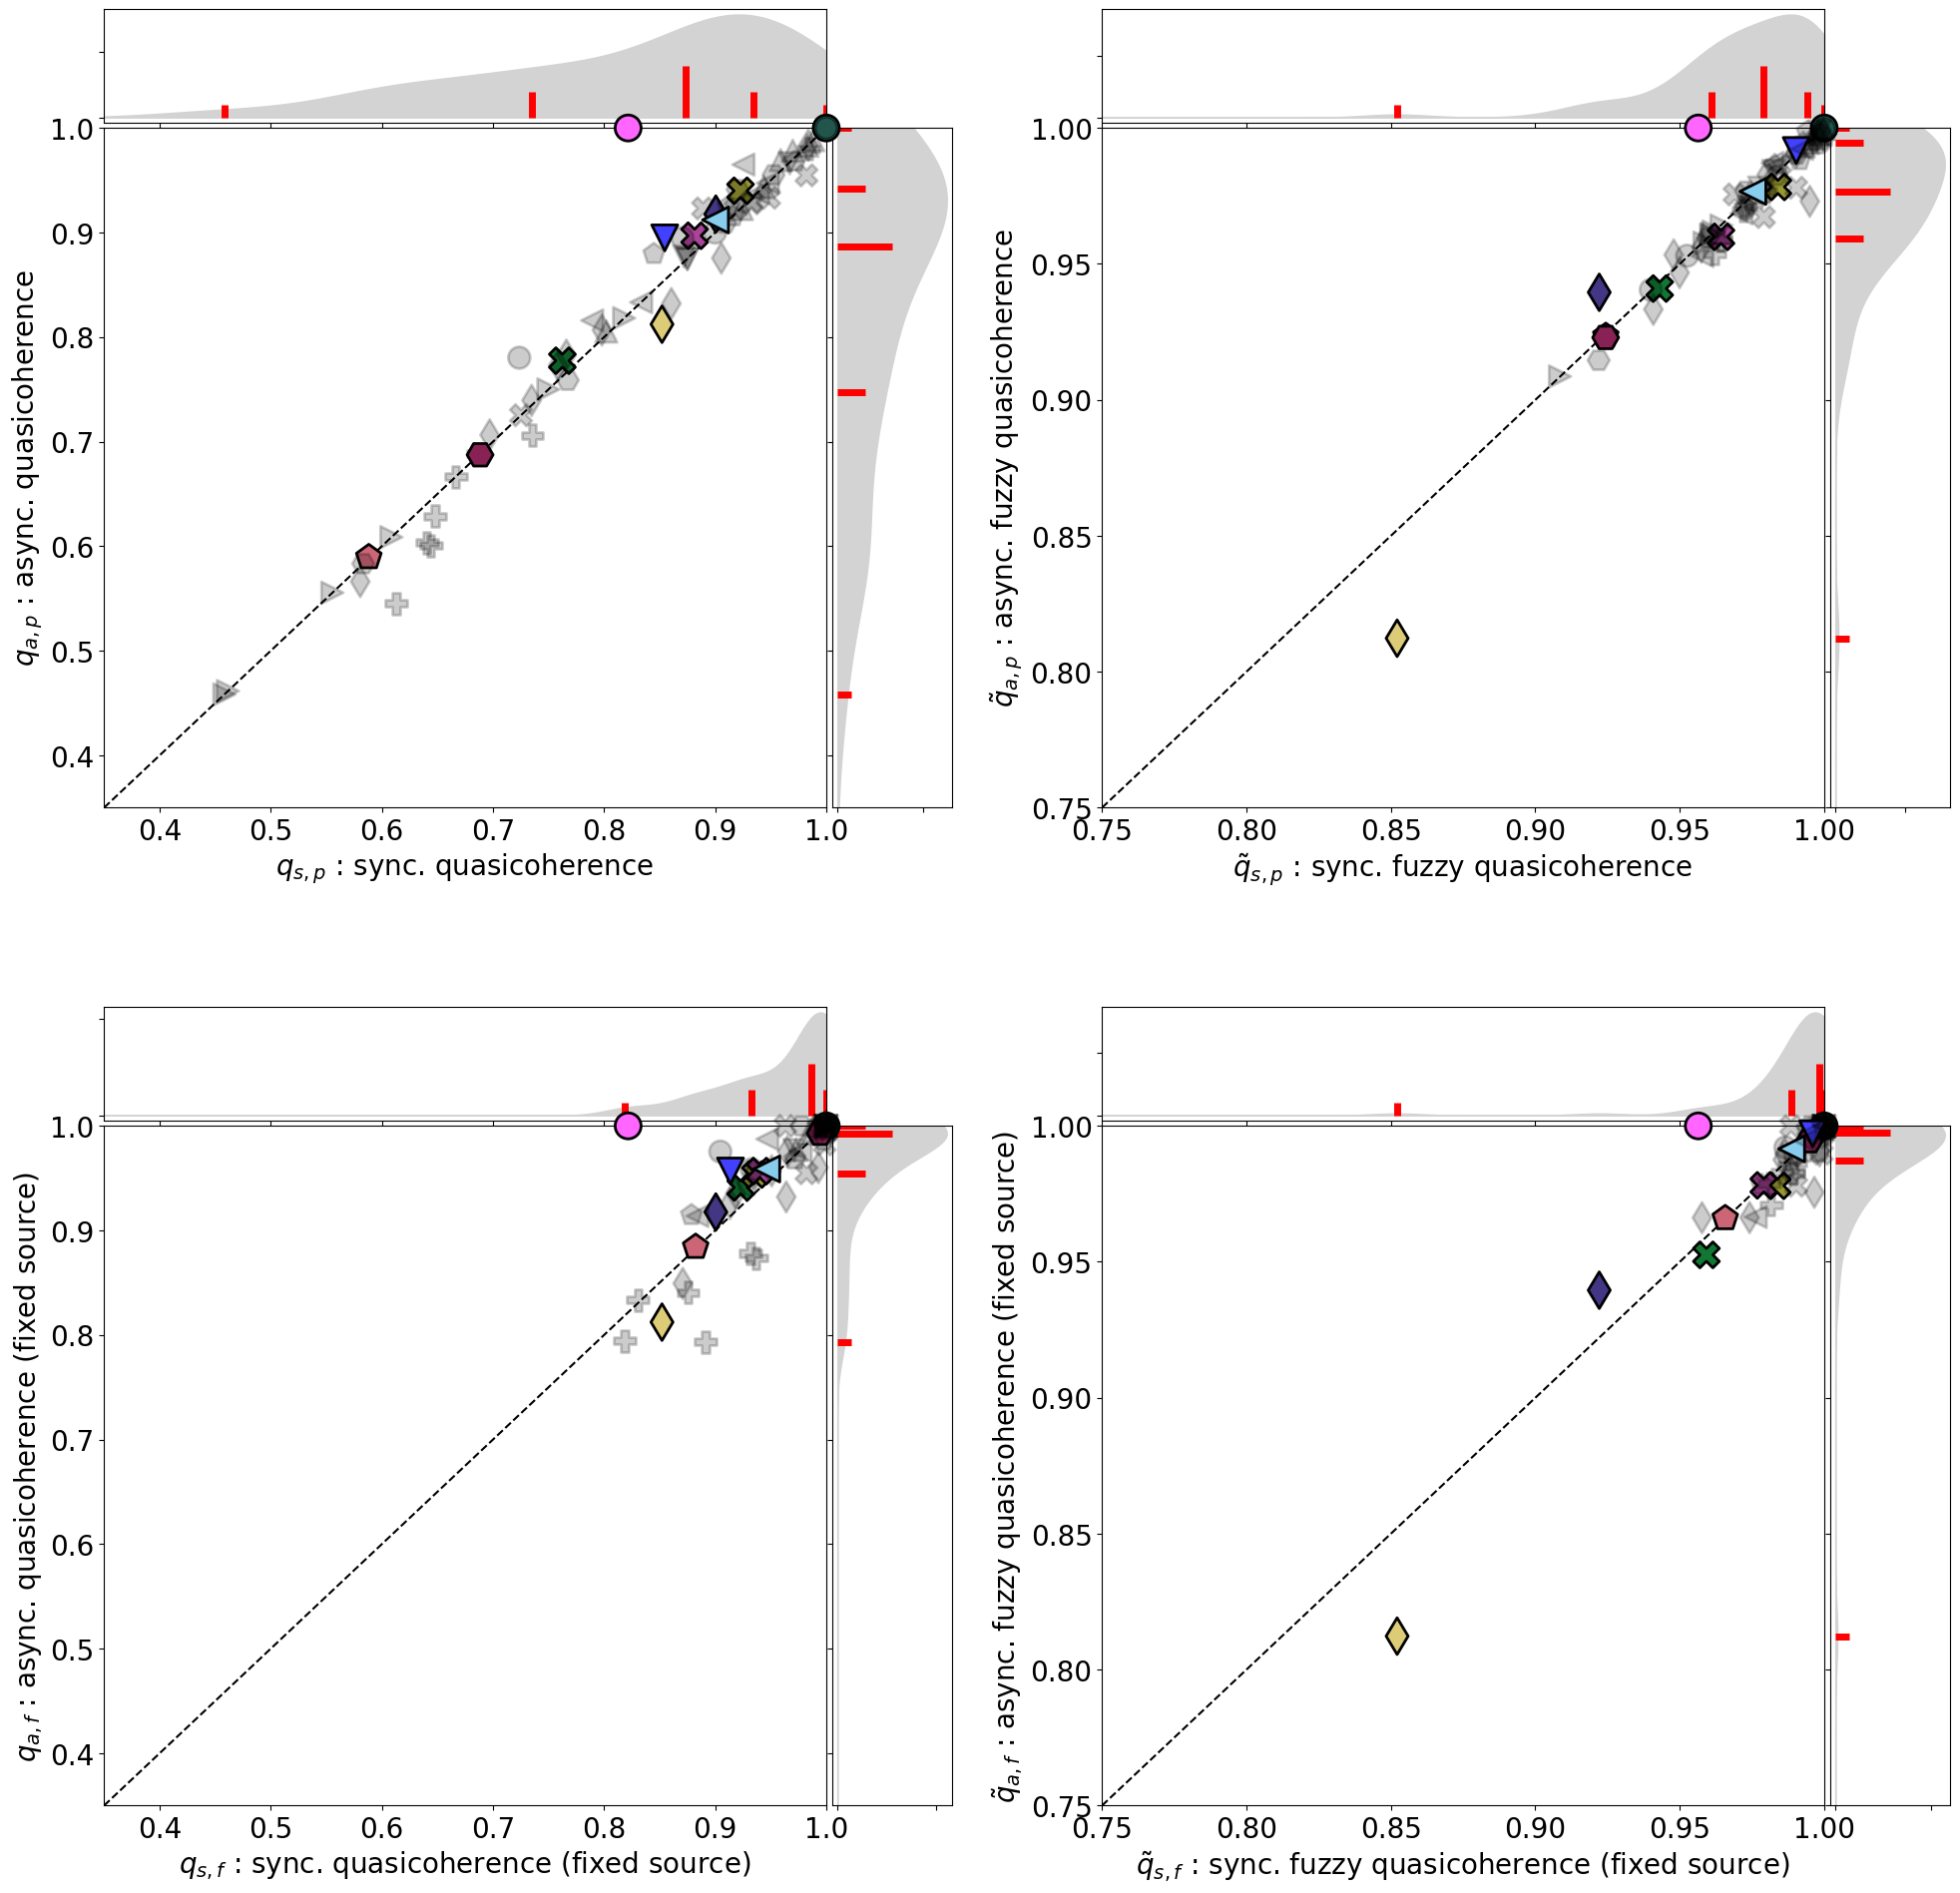

In [11]:
vars = [
    [
        (PlotVar("SQC", 0.35, 1.0), PlotVar("AQC", 0.35, 1.0)),
        (PlotVar("SFQC", 0.75, 1.0), PlotVar("AFQC", 0.75, 1.0)),
    ],
    [
        (PlotVar("SQCNS", 0.35, 1.0), PlotVar("AQCNS", 0.35, 1.0)),
        (PlotVar("SFQCNS", 0.75, 1.0), PlotVar("AFQCNS", 0.75, 1.0)),
    ],
]

fig = comparison_plots(vars)
fig.savefig(
    f"./data/{models_dir}/figures/quasicoherence_comparisons.png", bbox_inches="tight"
)
fig.savefig(
    f"./data/{models_dir}/figures/quasicoherence_comparisons.pdf", bbox_inches="tight"
)

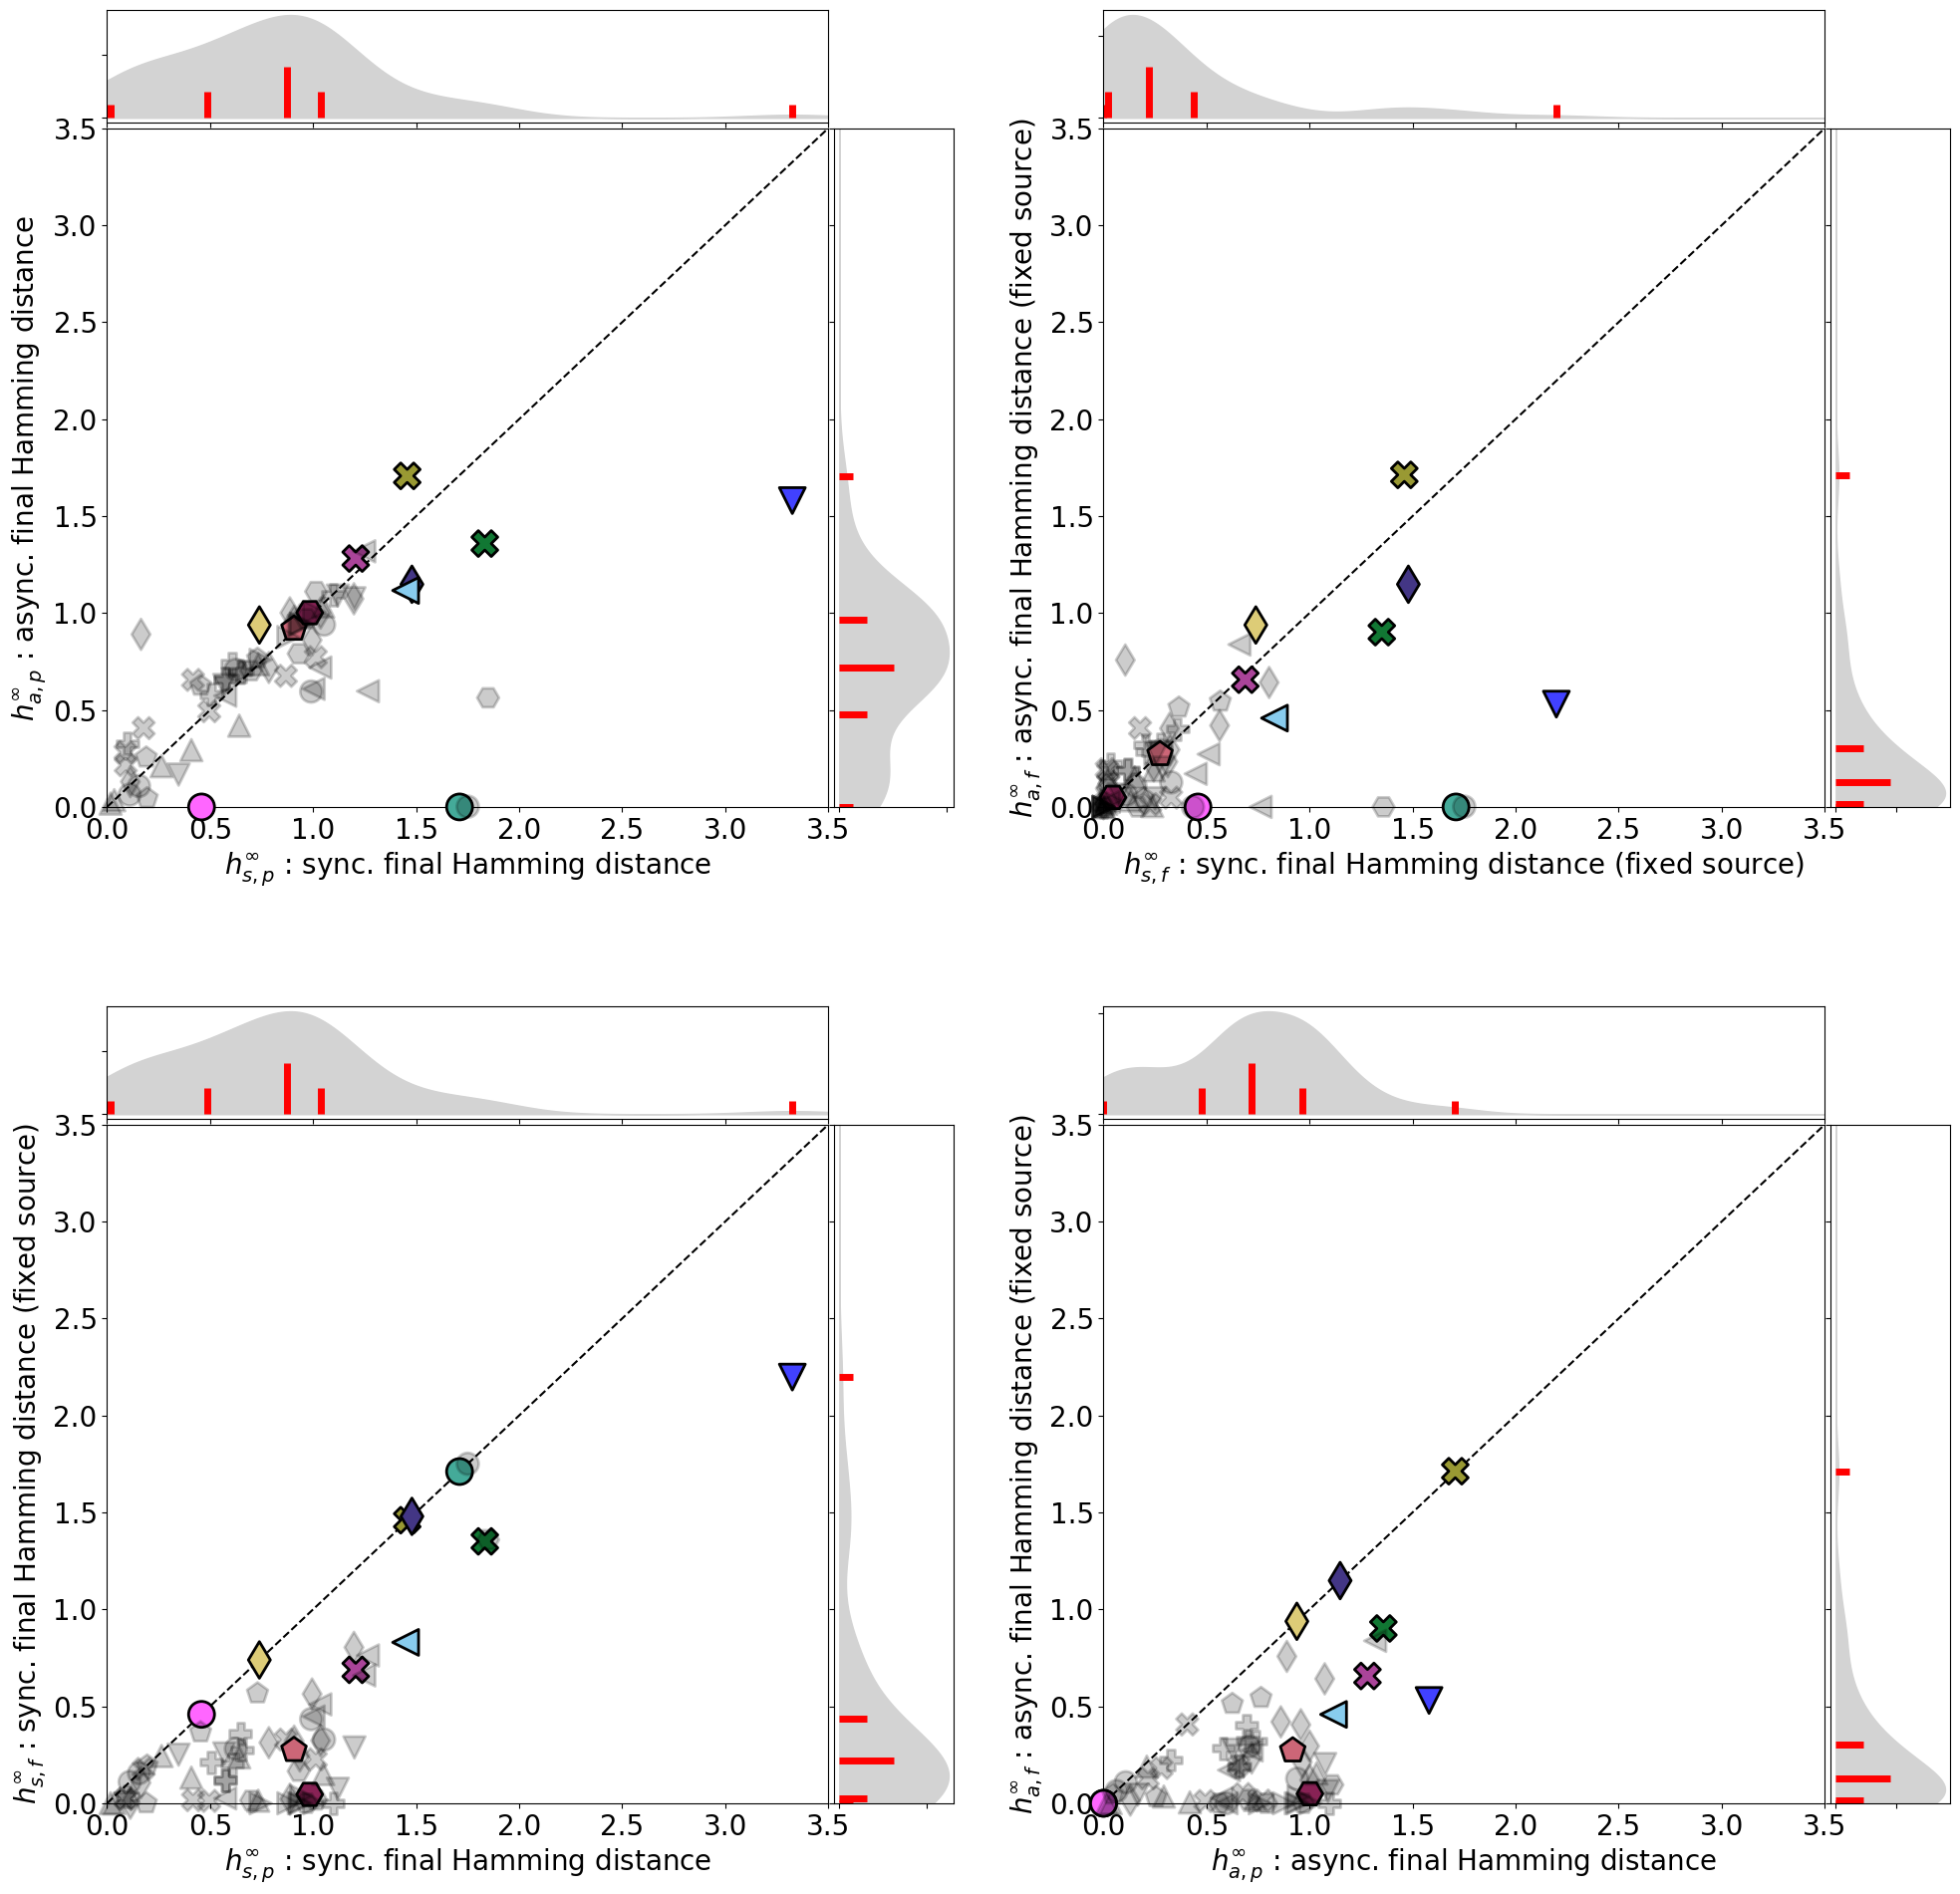

In [12]:
vars = [
    [
        (PlotVar("SFHD", 0.0, 3.5), PlotVar("AFHD", 0.0, 3.5)),
        (PlotVar("SFHDNS", 0.0, 3.5), PlotVar("AFHDNS", 0.0, 3.5)),
    ],
    [
        (PlotVar("SFHD", 0.0, 3.5), PlotVar("SFHDNS", 0.0, 3.5)),
        (PlotVar("AFHD", 0.0, 3.5), PlotVar("AFHDNS", 0.0, 3.5)),
    ],
]

fig = comparison_plots(vars)
fig.savefig(f"./data/{models_dir}/figures/Hamming_comparison.png", bbox_inches="tight")
fig.savefig(f"./data/{models_dir}/figures/Hamming_comparison.pdf", bbox_inches="tight")

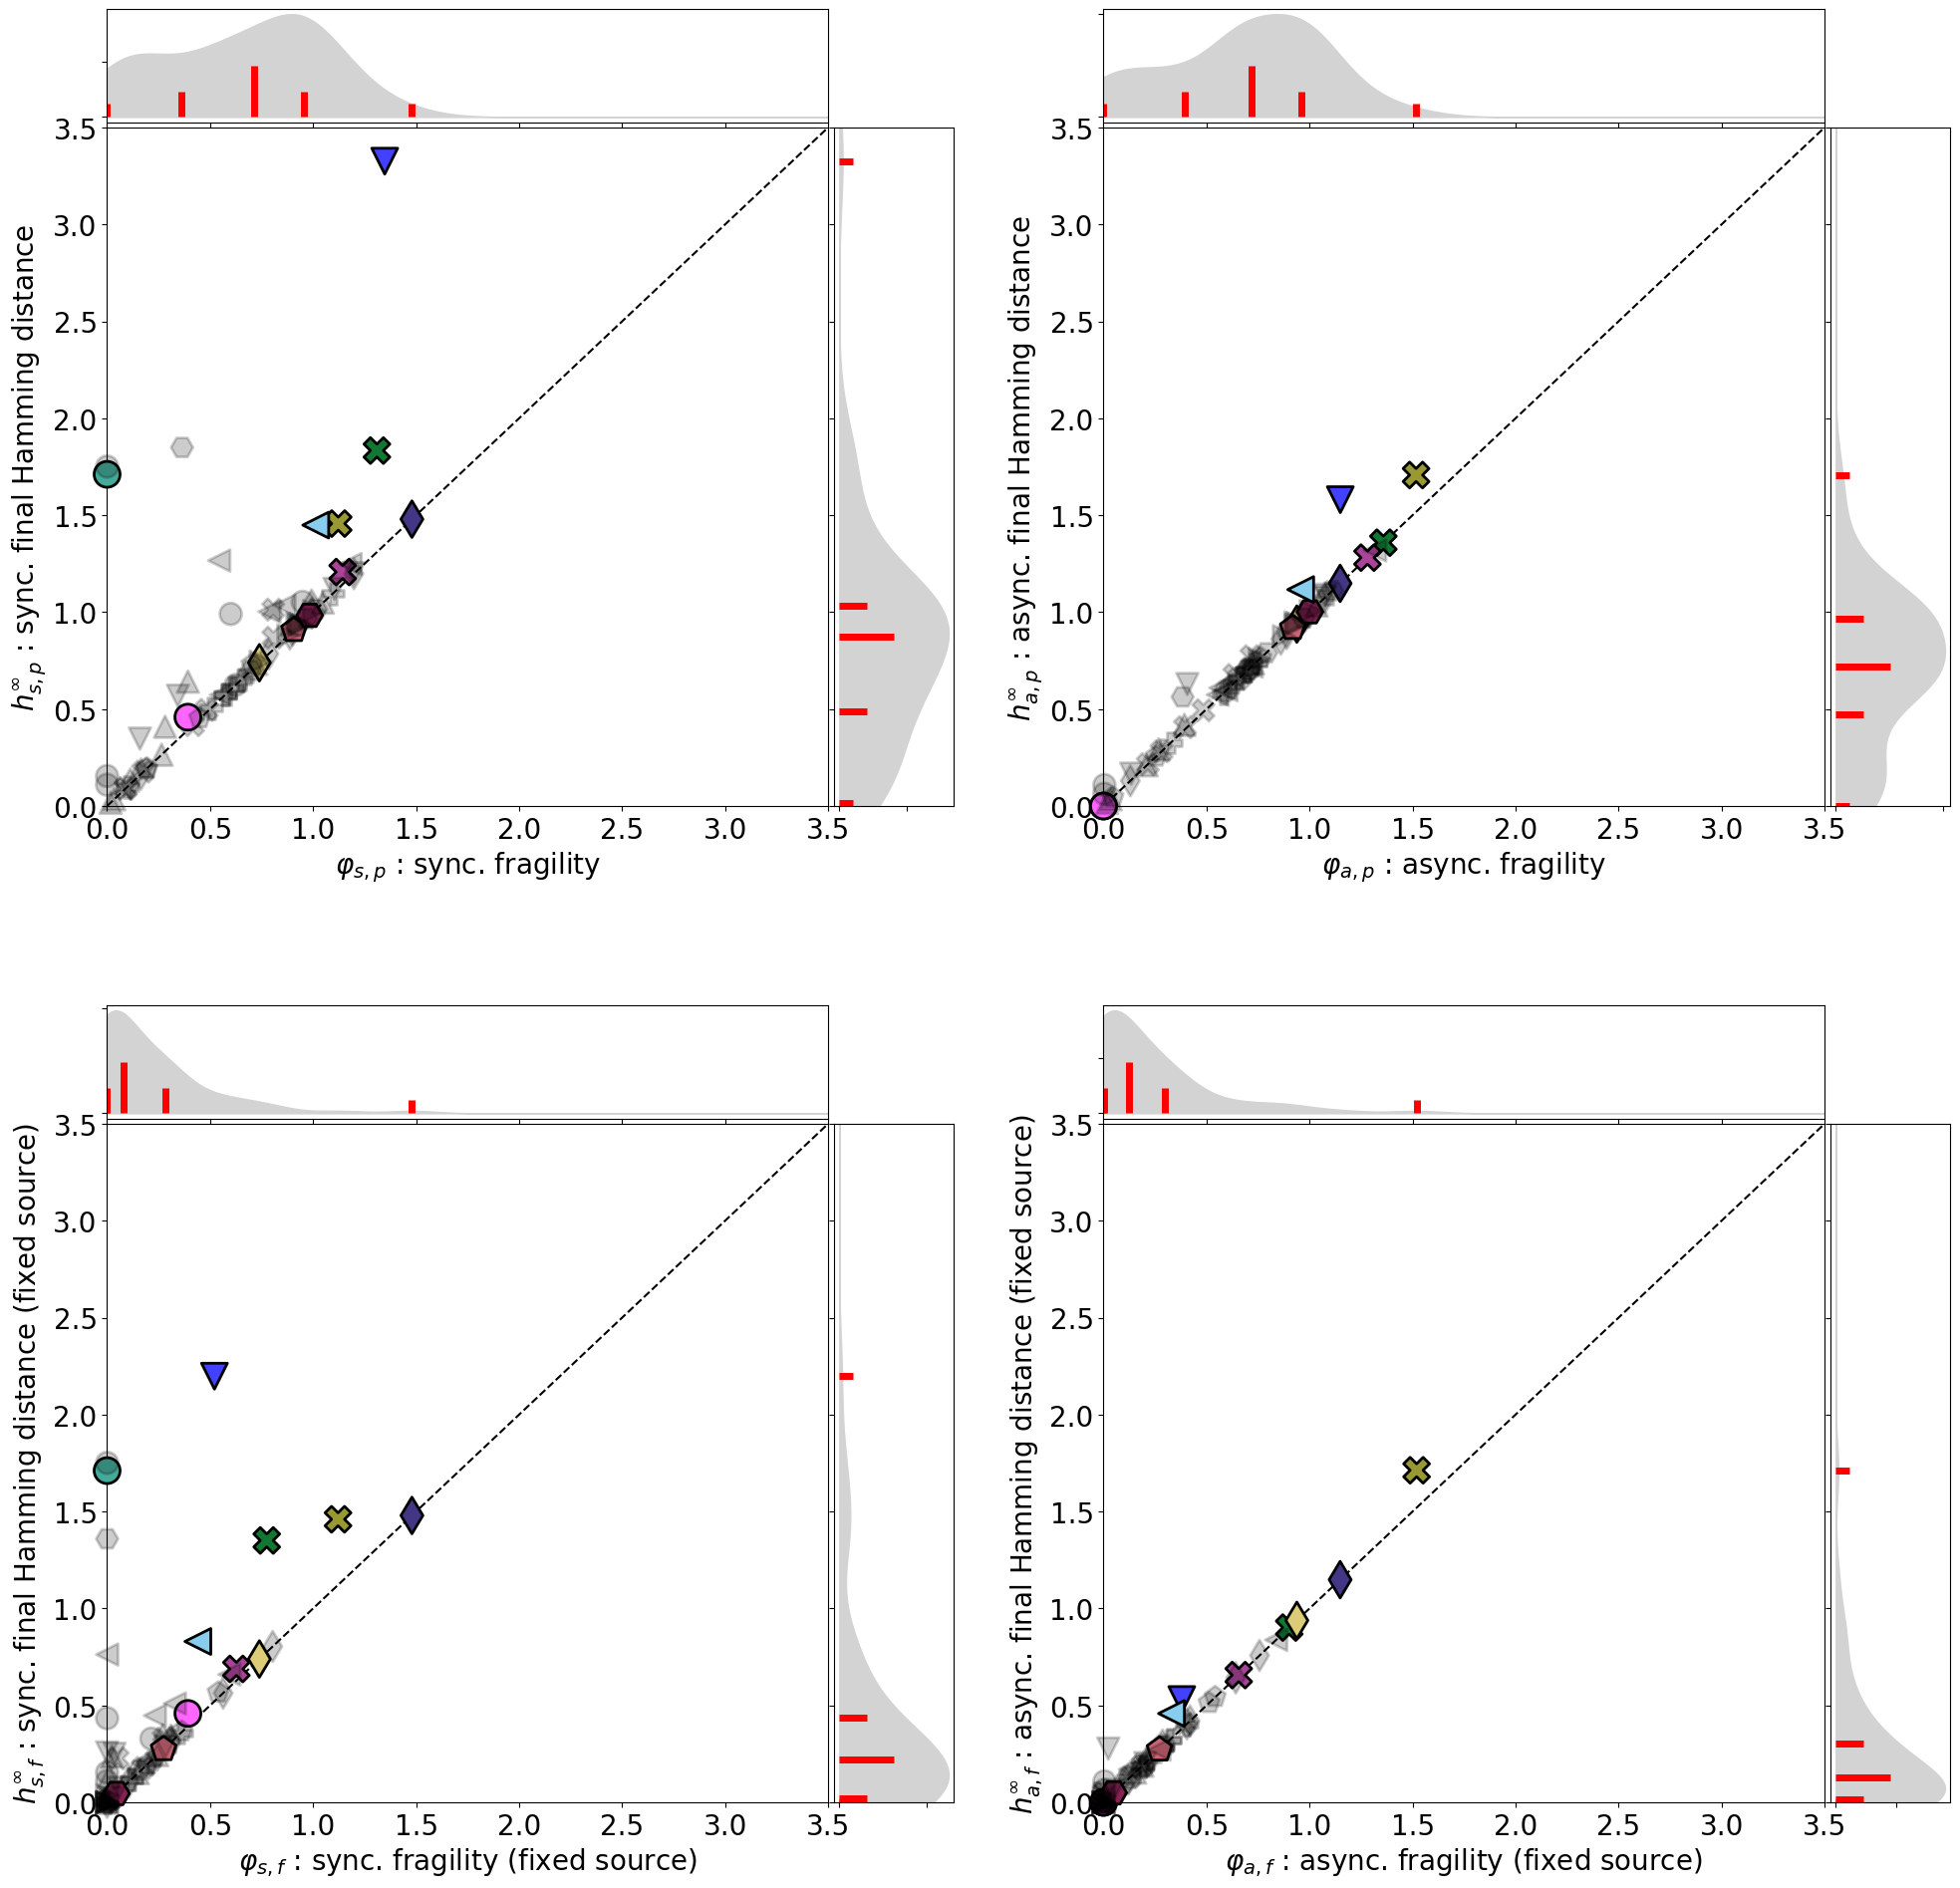

In [13]:
vars = [
    [
        (PlotVar("SF", 0.0, 3.5), PlotVar("SFHD", 0.0, 3.5)),
        (PlotVar("AF", 0.0, 3.5), PlotVar("AFHD", 0.0, 3.5)),
    ],
    [
        (PlotVar("SFNS", 0.0, 3.5), PlotVar("SFHDNS", 0.0, 3.5)),
        (PlotVar("AFNS", 0.0, 3.5), PlotVar("AFHDNS", 0.0, 3.5)),
    ],
]

fig = comparison_plots(vars)
fig.savefig(f"./data/{models_dir}/figures/Hamming-Fragility.png", bbox_inches="tight")
fig.savefig(f"./data/{models_dir}/figures/Hamming-Fragility.pdf", bbox_inches="tight")

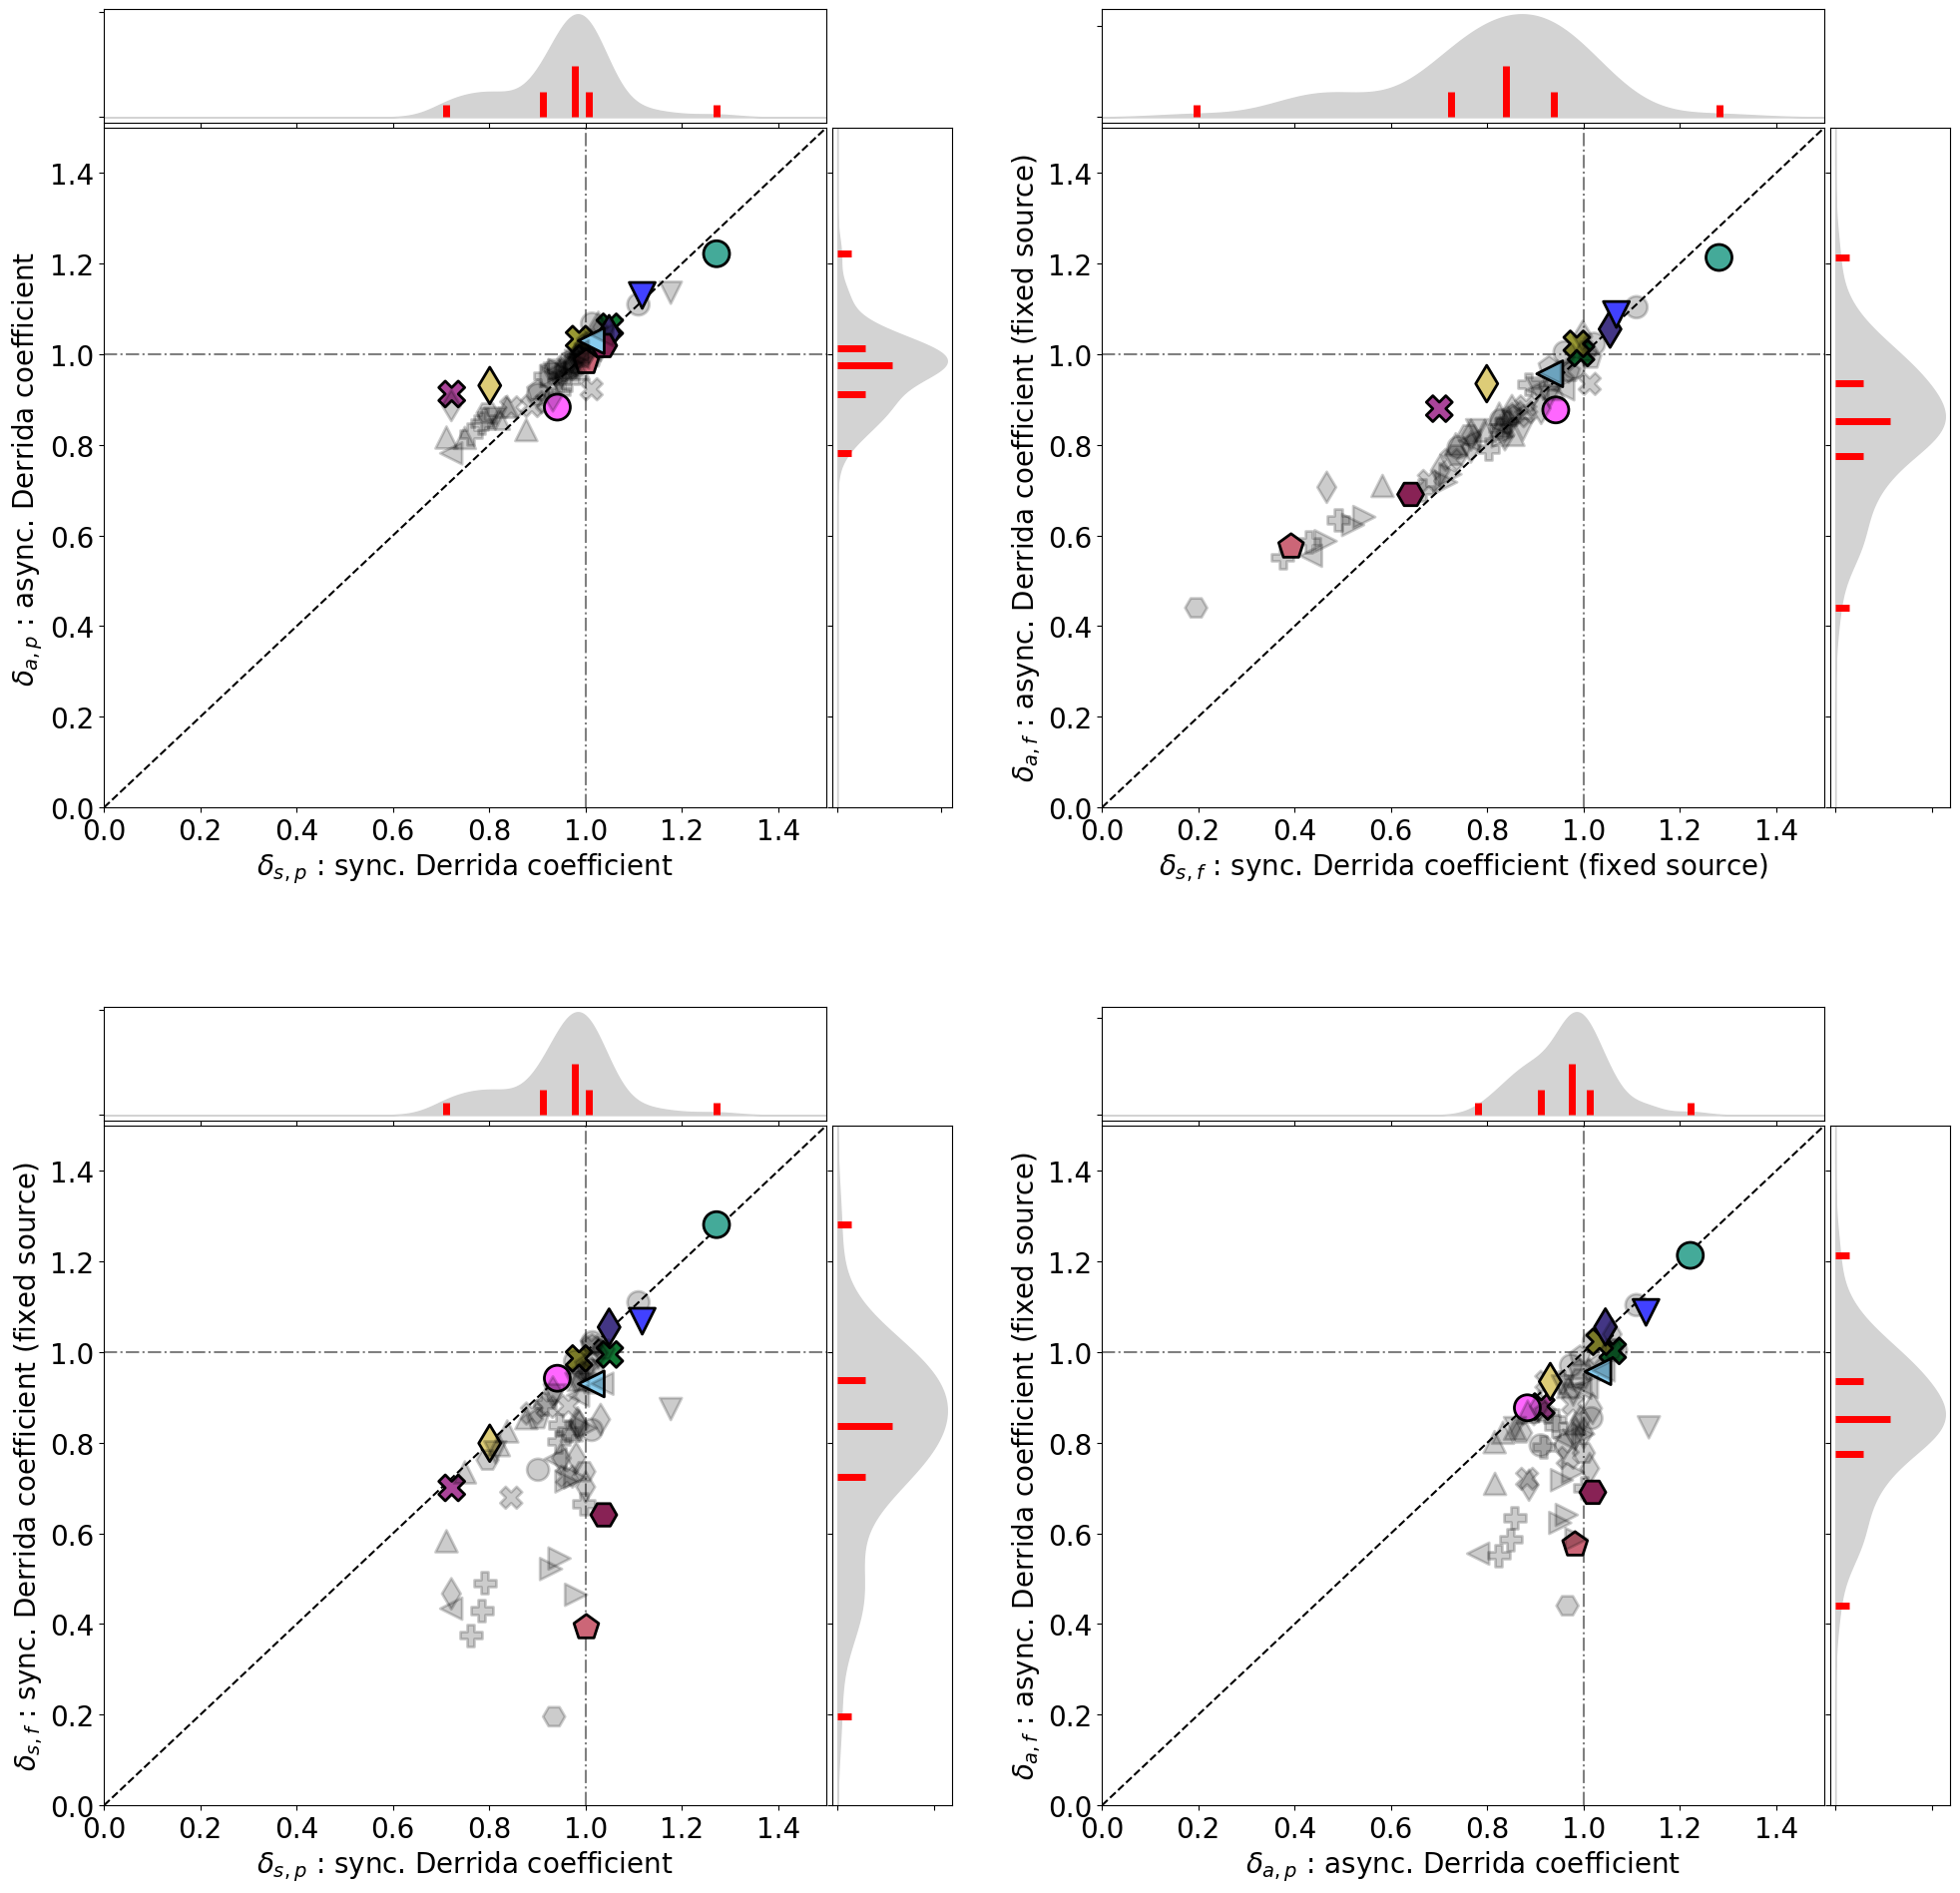

In [14]:
vars = [
    [
        (PlotVar("SDC", 0.0, 1.5), PlotVar("ADC", 0.0, 1.5)),
        (PlotVar("SDCNS", 0.0, 1.5), PlotVar("ADCNS", 0.0, 1.5)),
    ],
    [
        (PlotVar("SDC", 0.0, 1.5), PlotVar("SDCNS", 0.0, 1.5)),
        (PlotVar("ADC", 0.0, 1.5), PlotVar("ADCNS", 0.0, 1.5)),
    ],
]

fig = comparison_plots(vars, vlines=[1.0], hlines=[1.0])
fig.savefig(f"./data/{models_dir}/figures/Derrida_comparison.png", bbox_inches="tight")
fig.savefig(f"./data/{models_dir}/figures/Derrida_comparison.pdf", bbox_inches="tight")

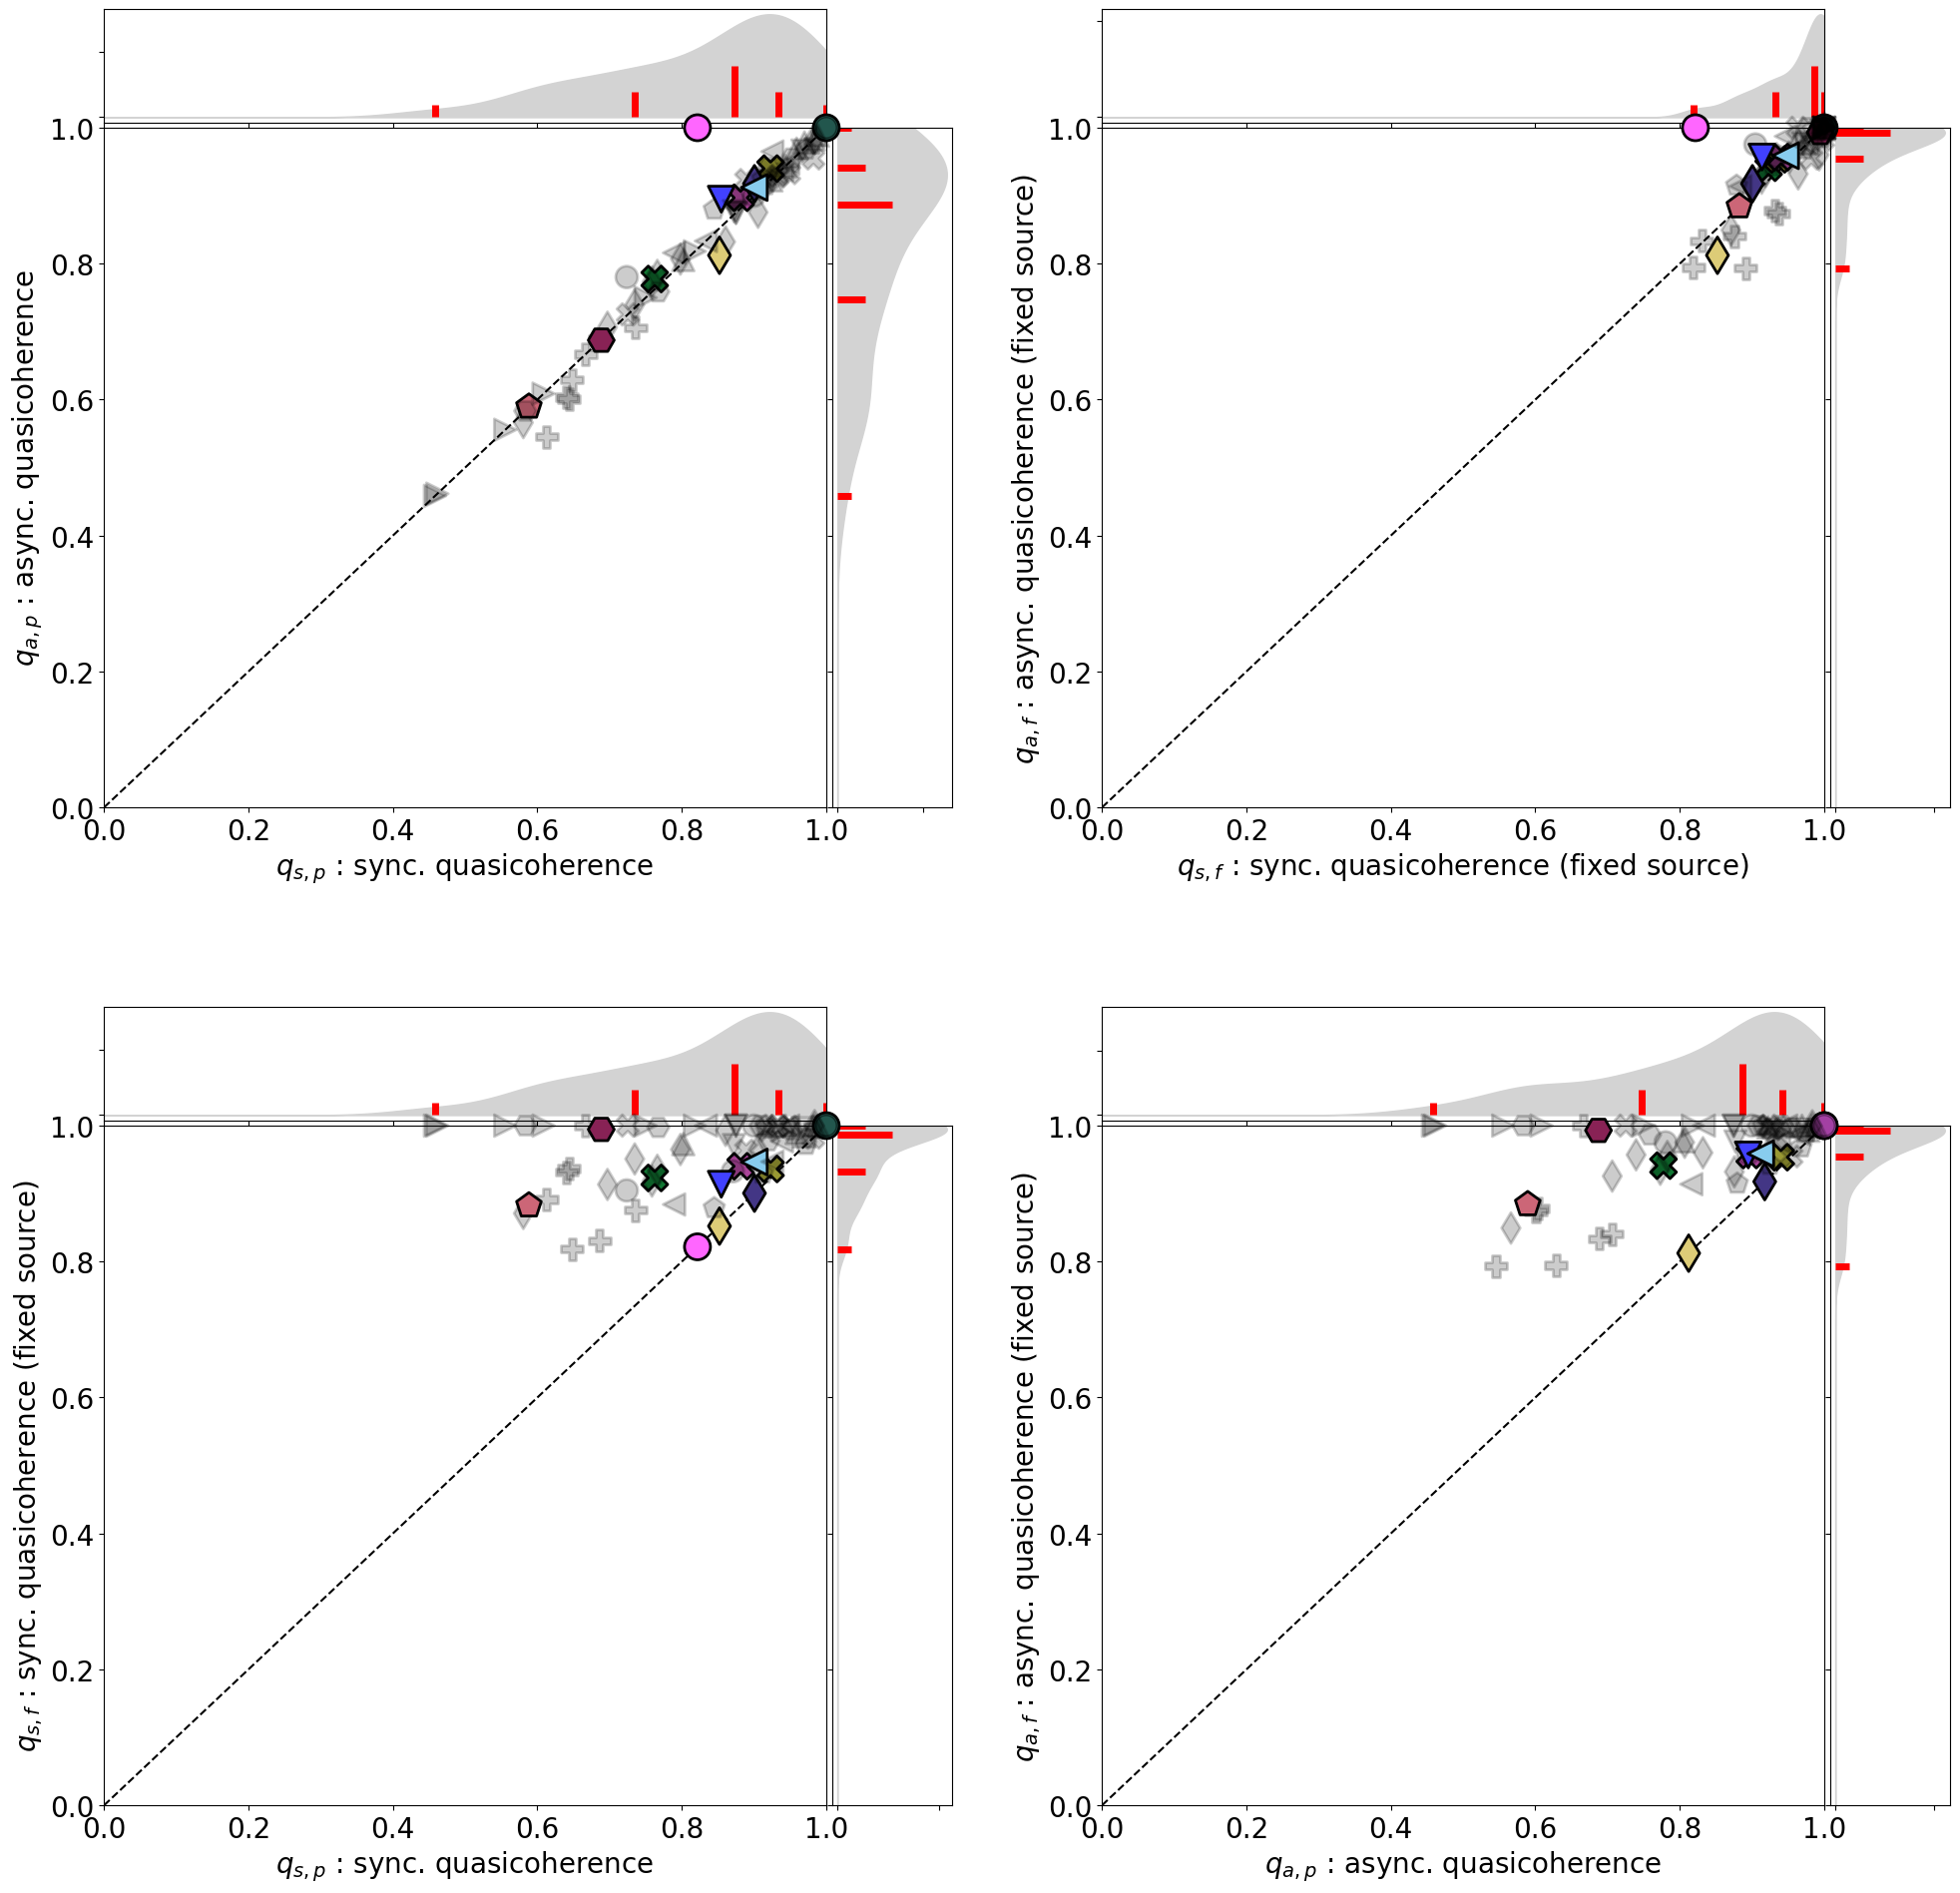

In [15]:
vars = [
    [
        (PlotVar("SQC", 0.0, 1.0), PlotVar("AQC", 0.0, 1.0)),
        (PlotVar("SQCNS", 0.0, 1.0), PlotVar("AQCNS", 0.0, 1.0)),
    ],
    [
        (PlotVar("SQC", 0.0, 1.0), PlotVar("SQCNS", 0.0, 1.0)),
        (PlotVar("AQC", 0.0, 1.0), PlotVar("AQCNS", 0.0, 1.0)),
    ],
]

fig = comparison_plots(vars)
fig.savefig(
    f"./data/{models_dir}/figures/quasicoherence_comparison.png", bbox_inches="tight"
)
fig.savefig(
    f"./data/{models_dir}/figures/quasicoherence_comparison.pdf", bbox_inches="tight"
)

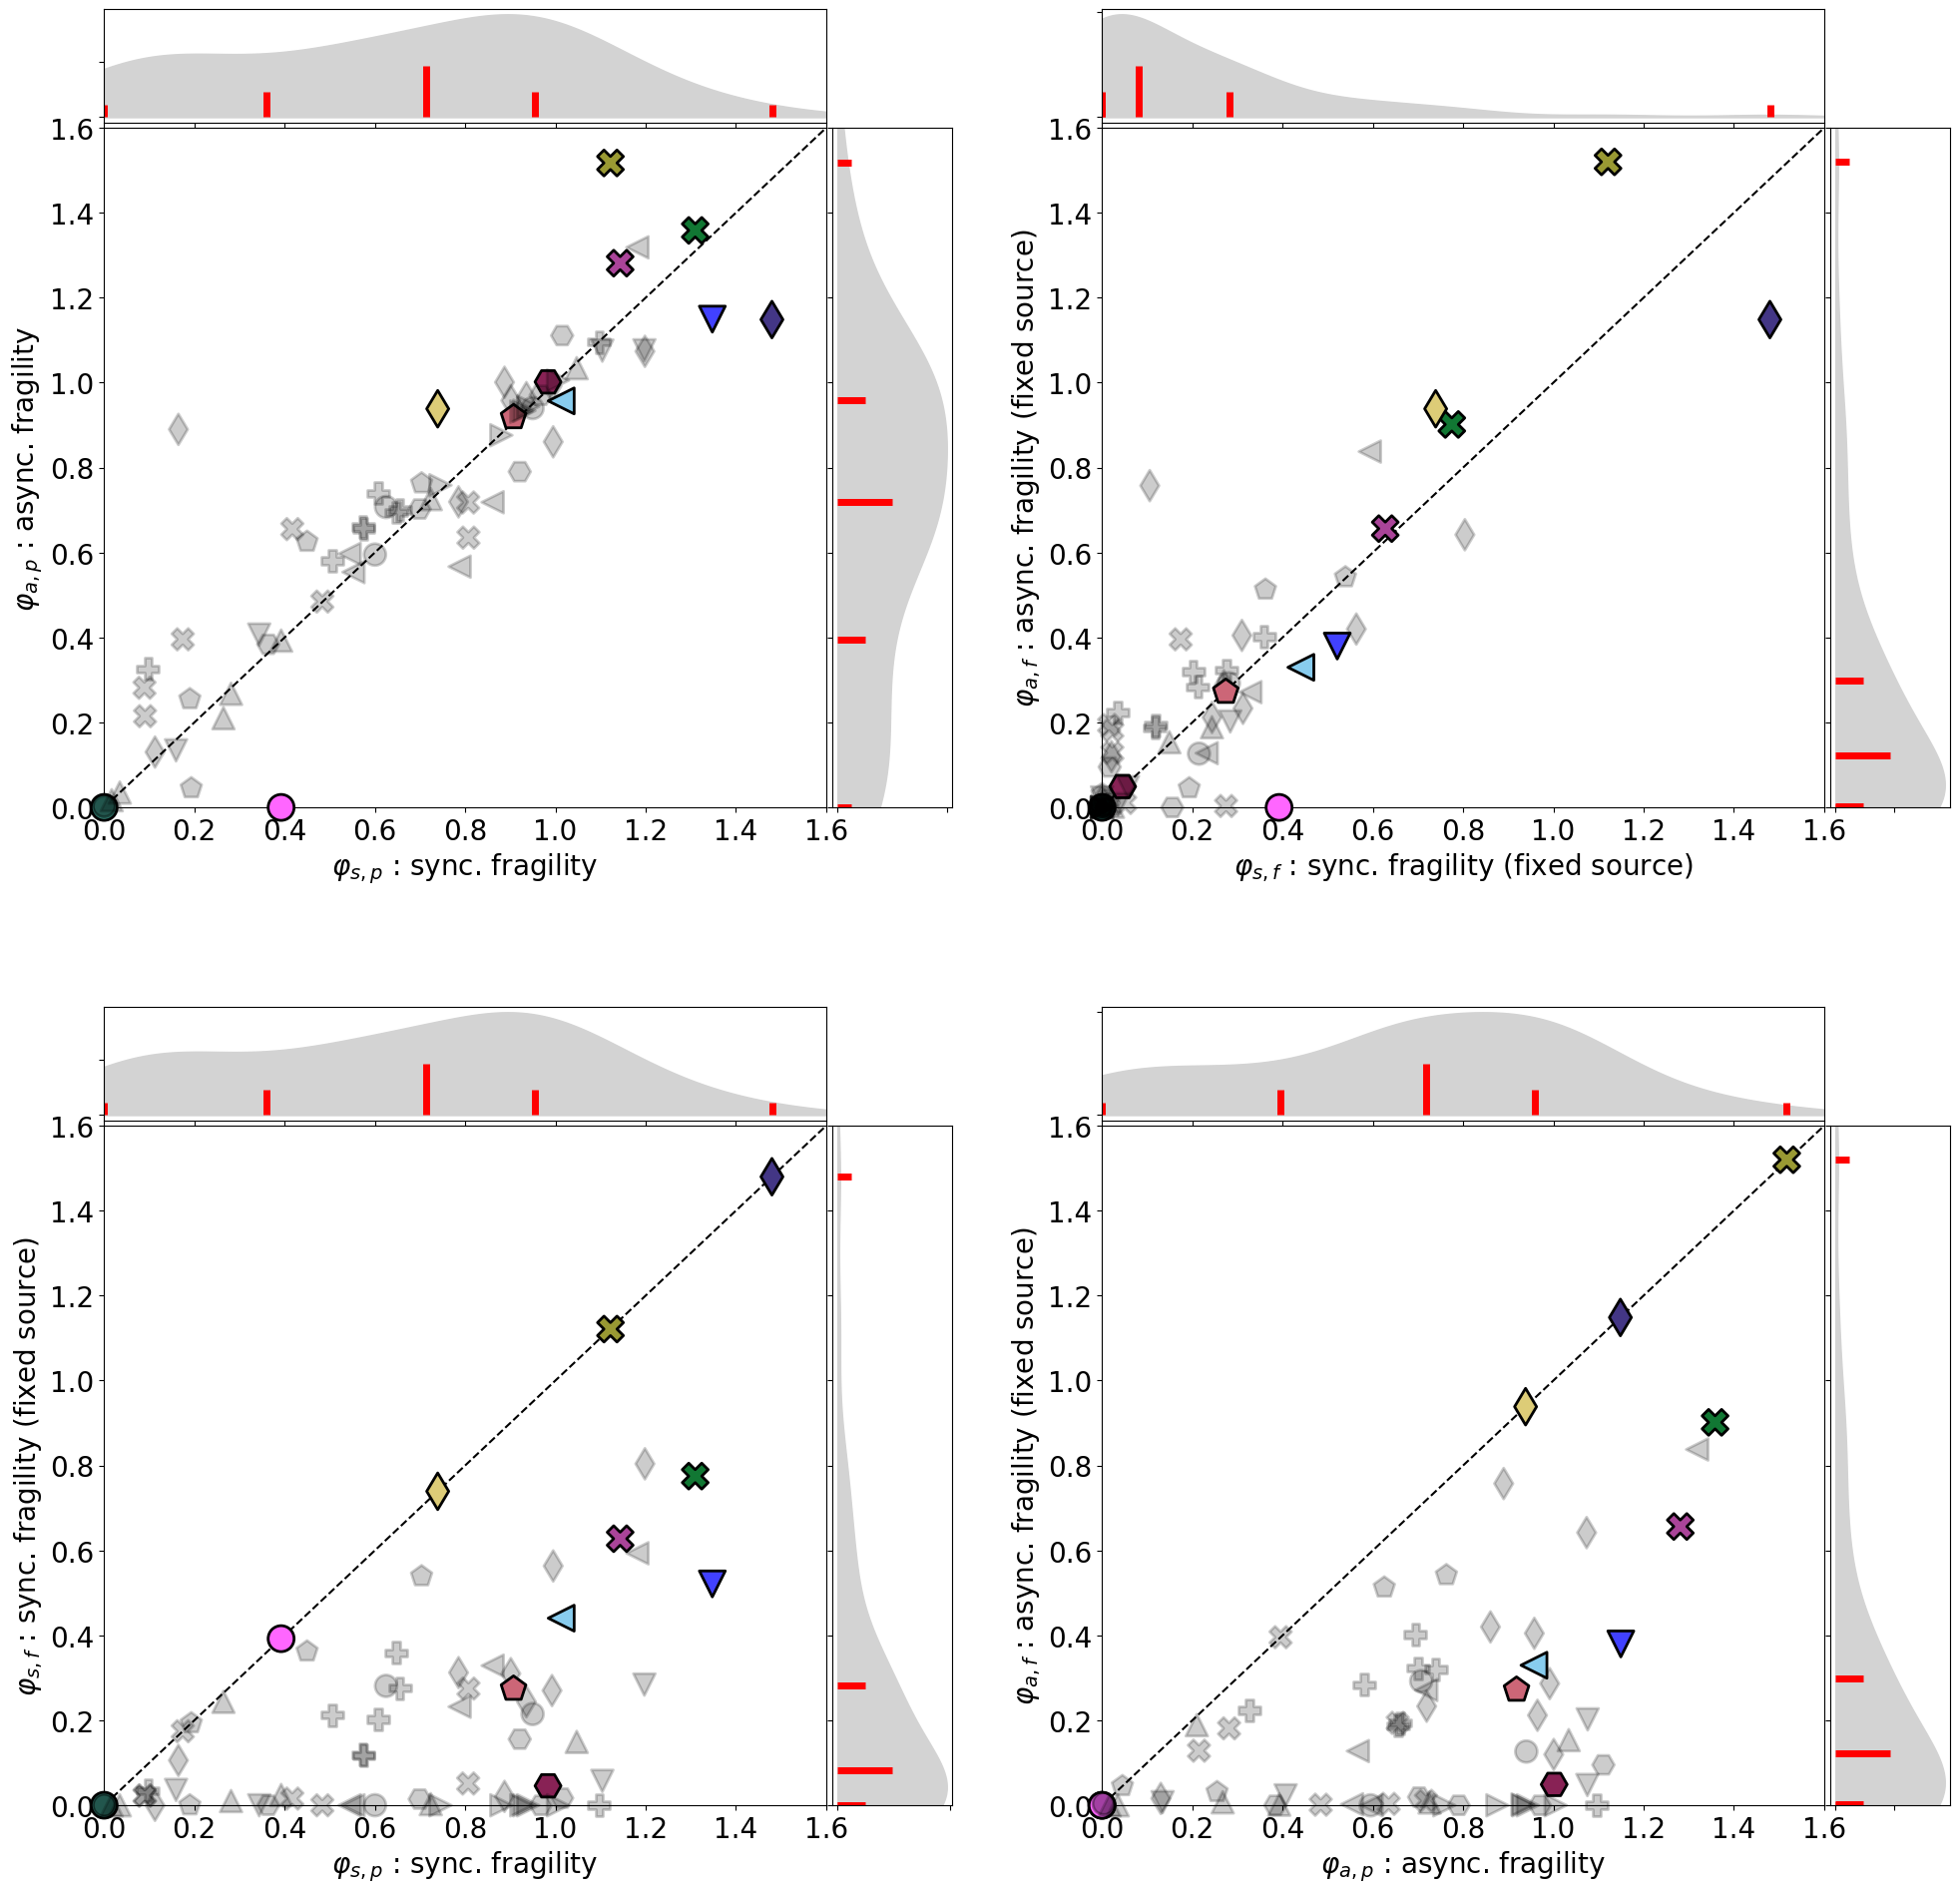

In [16]:
vars = [
    [
        (PlotVar("SF", 0.0, 1.6), PlotVar("AF", 0.0, 1.6)),
        (PlotVar("SFNS", 0.0, 1.6), PlotVar("AFNS", 0.0, 1.6)),
    ],
    [
        (PlotVar("SF", 0.0, 1.6), PlotVar("SFNS", 0.0, 1.6)),
        (PlotVar("AF", 0.0, 1.6), PlotVar("AFNS", 0.0, 1.6)),
    ],
]

fig = comparison_plots(vars)
fig.savefig(
    f"./data/{models_dir}/figures/fragility_comparison.png", bbox_inches="tight"
)
fig.savefig(
    f"./data/{models_dir}/figures/fragility_comparison.pdf", bbox_inches="tight"
)

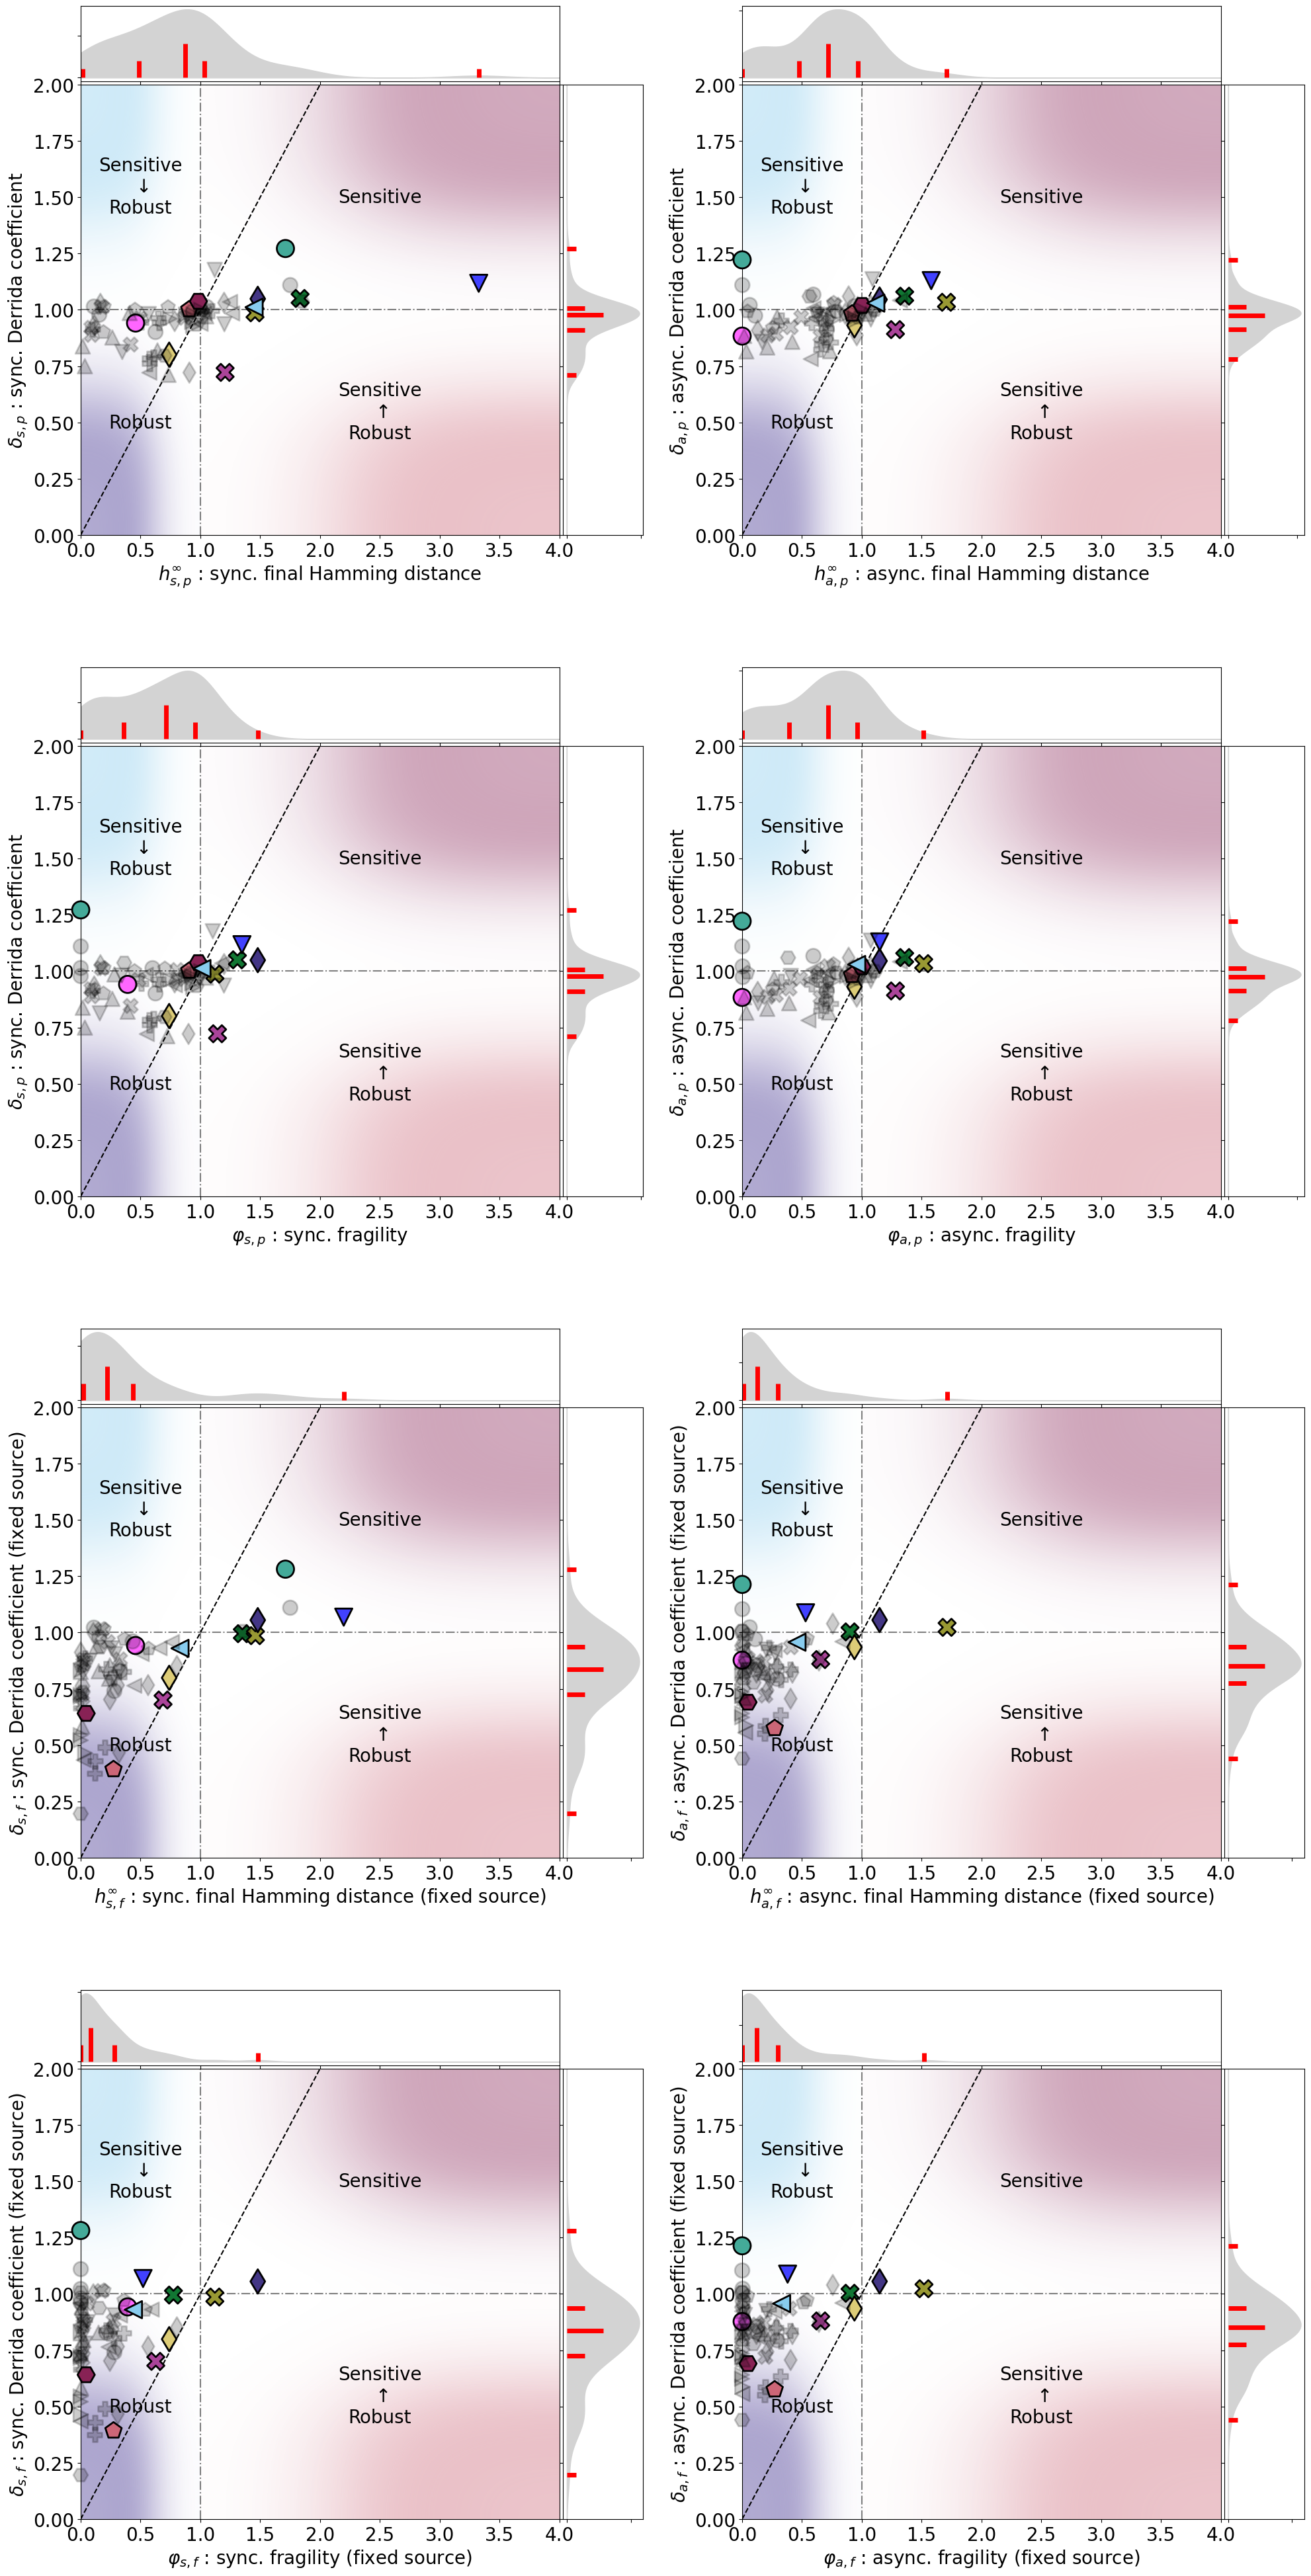

In [17]:
vars = [
    [
        (PlotVar("SFHD", 0.0, 4.0), PlotVar("SDC", 0.0, 2.0)),
        (PlotVar("AFHD", 0.0, 4.0), PlotVar("ADC", 0.0, 2.0)),
    ],
    [
        (PlotVar("SF", 0.0, 4.0), PlotVar("SDC", 0.0, 2.0)),
        (PlotVar("AF", 0.0, 4.0), PlotVar("ADC", 0.0, 2.0)),
    ],
    [
        (PlotVar("SFHDNS", 0.0, 4.0), PlotVar("SDCNS", 0.0, 2.0)),
        (PlotVar("AFHDNS", 0.0, 4.0), PlotVar("ADCNS", 0.0, 2.0)),
    ],
    [
        (PlotVar("SFNS", 0.0, 4.0), PlotVar("SDCNS", 0.0, 2.0)),
        (PlotVar("AFNS", 0.0, 4.0), PlotVar("ADCNS", 0.0, 2.0)),
    ],
]

quads = (
    1,
    1,
    [
        "#88225560",
        "#88CCEE60",
        "#33228860",
        "#CC667760",
    ],
    [
        "Sensitive",
        ("Sensitive\n" + r"$\downarrow$" + "\nRobust\n"),
        "Robust",
        ("Sensitive\n" + r"$\uparrow$" + "\nRobust\n"),
    ],
)

fig = comparison_plots(vars, hlines=1, vlines=1, quads=quads)
fig.savefig(
    f"./data/{models_dir}/figures/Derrida-Hamming-Fragility.png", bbox_inches="tight"
)
fig.savefig(
    f"./data/{models_dir}/figures/Derrida-Hamming-Fragility.pdf", bbox_inches="tight"
)